In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df_crime = pd.read_csv('crime.csv')
# df_crime.head()

First, we need to mount your Google Drive. This will prompt us to authenticate our Google account.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Once our Drive is mounted, we can access our files. **Remember to replace `path/to/your/file.csv` with the actual path to your file.**

In [ ]:

# Example: Reading a CSV file from Google Drive
# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
# For example: '/content/drive/MyDrive/my_data.csv'
try:
    # df_crime = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SEA 500/Final Project/crime.csv')
    df_crime = pd.read_csv('/content/drive/MyDrive/crime.csv')
    print("File loaded successfully!")
    display(df_crime.head())
except FileNotFoundError:
    print("Error: The file was not found. Please check the path and filename.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully!


,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y
0,1,GO-20141261013,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,4,...,Assault,Assault,155,Downsview (155),026,Downsview-Roding-CFB (26),-79.483869,43.734369,-8.848104e+06,5.424427e+06
1,2,GO-20141261561,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,8,...,Assault With Weapon,Assault,154,Oakdale-Beverley Heights (154),026,Downsview-Roding-CFB (26),-79.513772,43.719813,-8.851433e+06,5.422185e+06
2,3,GO-20141262377,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,12,...,Assault Bodily Harm,Assault,068,North Riverdale (68),068,North Riverdale (68),-79.357562,43.674791,-8.834043e+06,5.415253e+06
3,4,GO-20141262553,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,14,...,Assault,Assault,094,Wychwood (94),094,Wychwood (94),-79.422371,43.673842,-8.841258e+06,5.415106e+06
4,5,GO-20141263115,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,16,...,Assault,Assault,120,Clairlea-Birchmount (120),120,Clairlea-Birchmount (120),-79.286725,43.700100,-8.826158e+06,5.419149e+06


# Exploratory Data Analysis



In [ ]:
# Find out number of rows and columns
df_crime.shape


(452949, 31)

In [ ]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452949 entries, 0 to 452948
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   OBJECTID           452949 non-null  int64  
 1   EVENT_UNIQUE_ID    452949 non-null  object 
 2   REPORT_DATE        452949 non-null  object 
 3   OCC_DATE           452949 non-null  object 
 4   REPORT_YEAR        452949 non-null  int64  
 5   REPORT_MONTH       452949 non-null  object 
 6   REPORT_DAY         452949 non-null  int64  
 7   REPORT_DOY         452949 non-null  int64  
 8   REPORT_DOW         452949 non-null  object 
 9   REPORT_HOUR        452949 non-null  int64  
 10  OCC_YEAR           452798 non-null  float64
 11  OCC_MONTH          452798 non-null  object 
 12  OCC_DAY            452798 non-null  float64
 13  OCC_DOY            452798 non-null  float64
 14  OCC_DOW            452798 non-null  object 
 15  OCC_HOUR           452949 non-null  int64  
 16  DI

In [ ]:
df_crime.describe()

,OBJECTID,REPORT_YEAR,REPORT_DAY,REPORT_DOY,REPORT_HOUR,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,UCR_CODE,UCR_EXT,LONG_WGS84,LAT_WGS84,x,y
count,452949.000000,452949.000000,452949.000000,452949.000000,452949.000000,452798.000000,452798.000000,452798.00000,452949.000000,452949.000000,452949.000000,452949.000000,452949.000000,4.529490e+05,4.529490e+05
mean,226475.000000,2019.790588,15.755321,183.212693,12.711206,2019.722243,15.435190,182.61512,12.556760,1709.238210,146.908067,-78.227370,43.062103,-8.708231e+06,5.340230e+06
std,130755.257877,3.397504,8.779119,102.957332,6.456066,3.429958,8.949285,103.48370,7.283552,329.732642,52.275629,9.571369,5.268745,1.065480e+06,6.534068e+05
min,1.000000,2014.000000,1.000000,1.000000,0.000000,2000.000000,1.000000,1.00000,0.000000,1410.000000,100.000000,-79.639247,0.000000,-8.865400e+06,5.664924e-09
25%,113238.000000,2017.000000,8.000000,96.000000,8.000000,2017.000000,8.000000,95.00000,7.000000,1430.000000,100.000000,-79.475052,43.659420,-8.847122e+06,5.412887e+06
50%,226475.000000,2020.000000,16.000000,184.000000,13.000000,2020.000000,15.000000,183.00000,14.000000,1450.000000,100.000000,-79.394133,43.699427,-8.838114e+06,5.419045e+06
75%,339712.000000,2023.000000,23.000000,270.000000,18.000000,2023.000000,23.000000,270.00000,19.000000,2120.000000,200.000000,-79.321995,43.750852,-8.830084e+06,5.426966e+06
max,452949.000000,2025.000000,31.000000,366.000000,23.000000,2025.000000,31.000000,366.00000,23.000000,2135.000000,230.000000,0.000000,43.853164,6.327780e-09,5.442747e+06


In [ ]:
df_crime.isnull().sum()


,0
OBJECTID,0
EVENT_UNIQUE_ID,0
REPORT_DATE,0
OCC_DATE,0
REPORT_YEAR,0
REPORT_MONTH,0
REPORT_DAY,0
REPORT_DOY,0
REPORT_DOW,0
REPORT_HOUR,0


In [ ]:
# Frequency of each year
df_crime['REPORT_YEAR'].value_counts()


,count
REPORT_YEAR,
2023,49617
2024,47344
2022,41787
2019,40126
2018,37350
2020,35190
2021,35160
2017,35141
2016,33536


In [ ]:
columns = ['OFFENCE', 'PREMISES_TYPE', 'UCR_CODE', 'MCI_CATEGORY']

for col in columns:
    print(f"Value counts for {col}:")
    print(df_crime[col].value_counts())
    print("-" * 50)



Value counts for OFFENCE:
OFFENCE
Assault                           166524
Theft Of Motor Vehicle             73739
B&E                                68322
Assault With Weapon                41658
Assault Bodily Harm                10456
B&E W'Intent                       10361
Robbery - Mugging                   9721
Theft Over                          8962
Assault Peace Officer               7859
Robbery With Weapon                 7587
Robbery - Other                     6587
Robbery - Business                  5929
Assault - Resist/ Prevent Seiz      3804
Theft From Motor Vehicle Over       3794
Aggravated Assault                  3217
Robbery - Swarming                  2805
Discharge Firearm With Intent       2735
Unlawfully In Dwelling-House        2702
Discharge Firearm - Recklessly      1941
Robbery - Vehicle Jacking           1722
Theft From Mail / Bag / Key         1688
Robbery - Home Invasion             1659
Pointing A Firearm                  1643
Robbery - Purse Snatch 

In [ ]:
print("Unique values per column in df_crime:")
for column in df_crime.columns:
    print(f"{column}: {df_crime[column].nunique()} unique values")

Unique values per column in df_crime:
OBJECTID: 452949 unique values
EVENT_UNIQUE_ID: 394433 unique values
REPORT_DATE: 4291 unique values
OCC_DATE: 4807 unique values
REPORT_YEAR: 12 unique values
REPORT_MONTH: 12 unique values
REPORT_DAY: 31 unique values
REPORT_DOY: 366 unique values
REPORT_DOW: 7 unique values
REPORT_HOUR: 24 unique values
OCC_YEAR: 26 unique values
OCC_MONTH: 12 unique values
OCC_DAY: 31 unique values
OCC_DOY: 366 unique values
OCC_DOW: 7 unique values
OCC_HOUR: 24 unique values
DIVISION: 18 unique values
LOCATION_TYPE: 54 unique values
PREMISES_TYPE: 7 unique values
UCR_CODE: 22 unique values
UCR_EXT: 16 unique values
OFFENCE: 51 unique values
MCI_CATEGORY: 5 unique values
HOOD_158: 159 unique values
NEIGHBOURHOOD_158: 159 unique values
HOOD_140: 141 unique values
NEIGHBOURHOOD_140: 141 unique values
LONG_WGS84: 19318 unique values
LAT_WGS84: 19318 unique values
x: 19317 unique values
y: 19316 unique values


In [ ]:
df_crime['MCI_CATEGORY'].describe()

,MCI_CATEGORY
count,451875
unique,5
top,Assault
freq,241717


In [ ]:
top_5_mci_categories = df_crime['MCI_CATEGORY'].value_counts().head(5)
print("Top 5 MCI Categories:")
print(top_5_mci_categories)

Top 5 MCI Categories:
MCI_CATEGORY
Assault            242671
Break and Enter     81551
Auto Theft          73739
Robbery             39117
Theft Over          15871
Name: count, dtype: int64


In [ ]:
df_crime.head()

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y,SEASON,Geo_Region
0,1,GO-20141261013,2014-01-01 05:00:00,2014-01-01 05:00:00,2014,January,1,1,Wednesday,4.0,...,155,Downsview (155),026,Downsview-Roding-CFB (26),-79.483869,43.734369,-8.848104e+06,5.424427e+06,Winter,West
1,2,GO-20141261561,2014-01-01 05:00:00,2014-01-01 05:00:00,2014,January,1,1,Wednesday,8.0,...,154,Oakdale-Beverley Heights (154),026,Downsview-Roding-CFB (26),-79.513772,43.719813,-8.851433e+06,5.422185e+06,Winter,West
2,3,GO-20141262377,2014-01-01 05:00:00,2014-01-01 05:00:00,2014,January,1,1,Wednesday,12.0,...,068,North Riverdale (68),068,North Riverdale (68),-79.357562,43.674791,-8.834043e+06,5.415253e+06,Winter,Central
3,4,GO-20141262553,2014-01-01 05:00:00,2014-01-01 05:00:00,2014,January,1,1,Wednesday,14.0,...,094,Wychwood (94),094,Wychwood (94),-79.422371,43.673842,-8.841258e+06,5.415106e+06,Winter,Central
4,5,GO-20141263115,2014-01-01 05:00:00,2014-01-01 05:00:00,2014,January,1,1,Wednesday,16.0,...,120,Clairlea-Birchmount (120),120,Clairlea-Birchmount (120),-79.286725,43.700100,-8.826158e+06,5.419149e+06,Winter,East


In [ ]:
df_crime['OCC_YEAR'].value_counts()

,count
OCC_YEAR,
2023.0,49432
2024.0,46411
2022.0,41823
2019.0,40200
2018.0,37602
2017.0,35585
2020.0,35352
2021.0,34970
2016.0,33688


# **Data Cleaning**

In [ ]:
# Count how many NSA values exist in each column
(df_crime == "NSA").sum()

,0
OBJECTID,0
EVENT_UNIQUE_ID,0
REPORT_DATE,0
OCC_DATE,0
REPORT_YEAR,0
REPORT_MONTH,0
REPORT_DAY,0
REPORT_DOY,0
REPORT_DOW,0
REPORT_HOUR,0


In [ ]:
import pandas as pd
import numpy as np # Import numpy for NaN

# Re-load df_crime and perform necessary preprocessing within this cell
try:
    df_crime = pd.read_csv('/content/drive/MyDrive/crime.csv')
except FileNotFoundError:
    print("Error: The file 'crime.csv' was not found. Please ensure it's in '/content/drive/MyDrive/'")
    # Exit or handle error appropriately
    exit()

# Ensure dates are datetime
df_crime['OCC_DATE'] = pd.to_datetime(df_crime['OCC_DATE'])
df_crime['REPORT_DATE'] = pd.to_datetime(df_crime['REPORT_DATE']) # Corrected typo here


# Filter rows where OCC_DATE year is between 1964 and 2001
old_years_ids = df_crime.loc[df_crime['OCC_DATE'].dt.year.between(1964, 2001), 'EVENT_UNIQUE_ID']

print(f"EVENT_UNIQUE_IDs with OCC_DATE years from 1964 to 2001 ({len(old_years_ids)} rows):")
print(old_years_ids.tolist())


# didn't think its logical to keep rows where crimes are reported atleast 20 years later
# Filter out rows before 2013
df_crime = df_crime[df_crime['OCC_DATE'].dt.year >= 2013]
df_crime = df_crime[df_crime['REPORT_DATE'].dt.year >= 2013]


#  Rows where all OCC_* columns are null BEFORE filling
null_rows_before = df_crime[df_crime[['OCC_YEAR','OCC_MONTH','OCC_DAY','OCC_DOY','OCC_DOW']].isnull().all(axis=1)]
print("Rows where all OCC_* columns are null BEFORE filling:")
print(null_rows_before)

# Fill missing OCC_* values from OCC_DATE
for col, func in zip(['OCC_YEAR','OCC_MONTH','OCC_DAY','OCC_DOY','OCC_DOW'],
                     [lambda x: x.dt.year, lambda x: x.dt.month, lambda x: x.dt.day,
                      lambda x: x.dt.dayofyear, lambda x: x.dt.dayofweek]):
    df_crime[col] = df_crime[col].fillna(func(df_crime['OCC_DATE']))

# Same rows AFTER filling
null_rows_after = df_crime.loc[null_rows_before.index]
print("\nSame rows AFTER filling OCC_* columns:")
print(null_rows_after)

# Optional: confirm no nulls remain in these rows
print("\nNull counts in these rows after filling:")
print(null_rows_after[['OCC_YEAR','OCC_MONTH','OCC_DAY','OCC_DOY','OCC_DOW']].isnull().sum())

# --- Additional Preprocessing (consistent with other cells) ---
# Replace 'NSA' entries with NaN
df_crime = df_crime.replace("NSA", np.nan)

# Identify numerical and categorical columns for imputation
num_cols = df_crime.select_dtypes(include=[np.number]).columns
cat_cols = df_crime.select_dtypes(exclude=[np.number]).columns


# Impute categorical columns with 'Unknown'
for col in cat_cols:
    df_crime[col] = df_crime[col].fillna('Unknown')


# Re-impute numerical NaNs after small value handling
for col in num_cols:
    median_val = df_crime[col].median()
    df_crime[col] = df_crime[col].fillna(median_val)

# Strip whitespace from 'REPORT_DOW'
df_crime['REPORT_DOW'] = df_crime['REPORT_DOW'].str.strip()



EVENT_UNIQUE_IDs with OCC_DATE years from 1964 to 2001 (206 rows):
['GO-20141262074', 'GO-20141292170', 'GO-20141396749', 'GO-20141396749', 'GO-20141514632', 'GO-20141514632', 'GO-20141635586', 'GO-20141150249', 'GO-20141150249', 'GO-20141672343', 'GO-20141672344', 'GO-20141672349', 'GO-20141722881', 'GO-20141947935', 'GO-20141963354', 'GO-20141963354', 'GO-20141963354', 'GO-20142047470', 'GO-20142269218', 'GO-20142600980', 'GO-20142771849', 'GO-20142857517', 'GO-20143243077', 'GO-20143243089', 'GO-20143243089', 'GO-20143164419', 'GO-20143197347', 'GO-20143212768', 'GO-20143243078', 'GO-20143243086', 'GO-20143249269', 'GO-20143453650', 'GO-20143543490', 'GO-20143562216', 'GO-201598363', 'GO-2015127055', 'GO-2015127055', 'GO-2015177384', 'GO-2015198520', 'GO-2015493318', 'GO-2015636294', 'GO-2015654326', 'GO-2015791187', 'GO-2015987474', 'GO-2015987474', 'GO-20151059022', 'GO-20151100757', 'GO-20151508629', 'GO-20151776190', 'GO-20151804633', 'GO-20152004479', 'GO-2016203004', 'GO-20163

In [ ]:
import numpy as np
import pandas as pd

# Define numeric columns
num_cols = df_crime.select_dtypes(include=[np.number]).columns

# 1️⃣ Detect very small invalid numeric values (like 1e-09)
threshold = 1e-3  # anything smaller than this in absolute value is likely invalid
small_values = (df_crime[num_cols].abs() < threshold).sum()
print("Columns with near-zero invalid values:\n", small_values[small_values > 0])

# 2️⃣ Replace those small/invalid values with NaN
df_crime[num_cols] = df_crime[num_cols].apply(lambda col: col.mask(col.abs() < threshold, np.nan))

# 3️⃣ Re-impute numerical NaNs with median
for col in num_cols:
    median_val = df_crime[col].median()
    df_crime[col] = df_crime[col].fillna(median_val)

# 4️⃣ Double-check x and y range sanity
print("\nValid x range:", df_crime['x'].min(), "to", df_crime['x'].max())
print("Valid y range:", df_crime['y'].min(), "to", df_crime['y'].max())

# 5️⃣ Confirm no tiny values remain
print("\nRemaining near-zero values per column:")
print((df_crime[num_cols].abs() < threshold).sum())

# 6️⃣ Preview coordinates to confirm fix
print("\nSample of x and y after cleaning:")
print(df_crime[['x', 'y']].head(10))

Columns with near-zero invalid values:
 REPORT_HOUR    15102
OCC_HOUR       31648
LONG_WGS84      6627
LAT_WGS84       6627
x               6627
y               6627
dtype: int64

Valid x range: -8865400.4618276 to -8807825.64403888
Valid y range: 5401671.50257173 to 5442747.00467992

Remaining near-zero values per column:
OBJECTID       0
REPORT_YEAR    0
REPORT_DAY     0
REPORT_DOY     0
REPORT_HOUR    0
OCC_YEAR       0
OCC_DAY        0
OCC_DOY        0
OCC_HOUR       0
UCR_CODE       0
UCR_EXT        0
LONG_WGS84     0
LAT_WGS84      0
x              0
y              0
dtype: int64

Sample of x and y after cleaning:
              x             y
0 -8.848104e+06  5.424427e+06
1 -8.851433e+06  5.422185e+06
2 -8.834043e+06  5.415253e+06
3 -8.841258e+06  5.415106e+06
4 -8.826158e+06  5.419149e+06
5 -8.827704e+06  5.418273e+06
6 -8.838988e+06  5.411068e+06
7 -8.841053e+06  5.409639e+06
8 -8.838777e+06  5.419975e+06
9 -8.838777e+06  5.419975e+06


# **Feature Engineering**

In [ ]:
# Map months to seasons to create 'SEASON' column
season_map = {
    'December':'Winter', 'January':'Winter', 'February':'Winter',
    'March':'Spring', 'April':'Spring', 'May':'Spring',
    'June':'Summer', 'July':'Summer', 'August':'Summer',
    'September':'Fall', 'October':'Fall', 'November':'Fall'
}
df_crime['SEASON'] = df_crime['OCC_MONTH'].map(season_map)

# Compute medians and percentiles to divide city into 5 regions for 'Geo_Region' column
lat_median = df_crime['LAT_WGS84'].median()
lon_median = df_crime['LONG_WGS84'].median()
lat_25 = df_crime['LAT_WGS84'].quantile(0.25)
lat_75 = df_crime['LAT_WGS84'].quantile(0.75)
lon_25 = df_crime['LONG_WGS84'].quantile(0.25)
lon_75 = df_crime['LONG_WGS84'].quantile(0.75)

def assign_region(row):
    lat, lon = row['LAT_WGS84'], row['LONG_WGS84']
    if lat_25 <= lat <= lat_75 and lon_25 <= lon <= lon_75:
        return 'Central'
    elif lat > lat_75:
        return 'North'
    elif lat < lat_25:
        return 'South'
    elif lon < lon_25:
        return 'West'
    else:
        return 'East'

df_crime['Geo_Region'] = df_crime.apply(assign_region, axis=1)

NameError: name 'df_crime' is not defined

# **Charts**

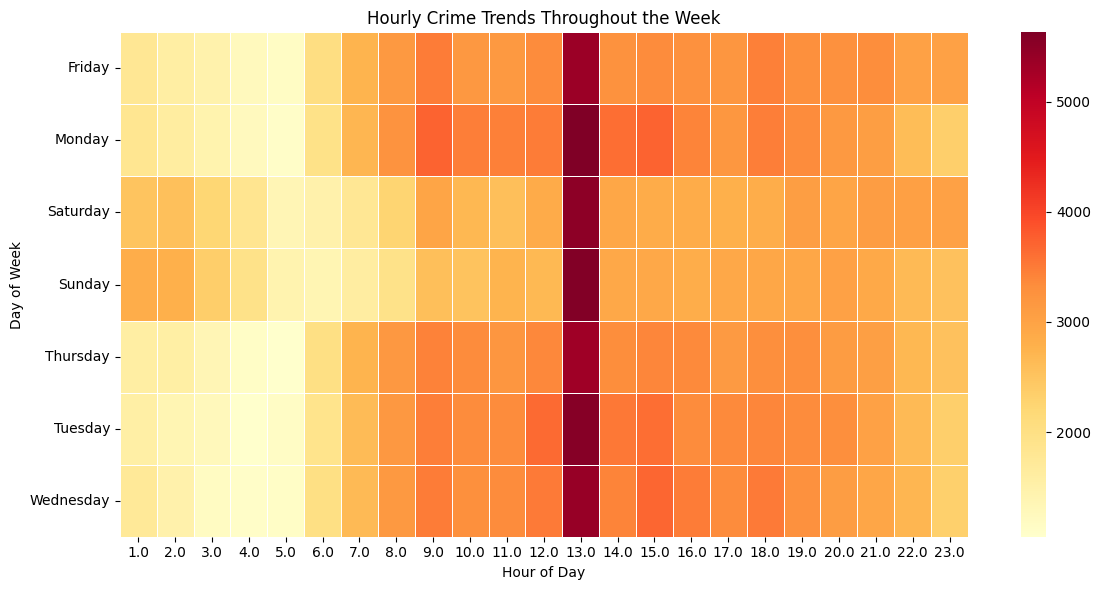

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heat_data = df_crime.groupby(['REPORT_DOW', 'REPORT_HOUR']).size().reset_index(name='Count')
heat_pivot = heat_data.pivot(index='REPORT_DOW', columns='REPORT_HOUR', values='Count')

plt.figure(figsize=(12,6))
sns.heatmap(heat_pivot, cmap="YlOrRd", linewidths=0.5)
plt.title("Hourly Crime Trends Throughout the Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()


<Figure size 1500x800 with 0 Axes>

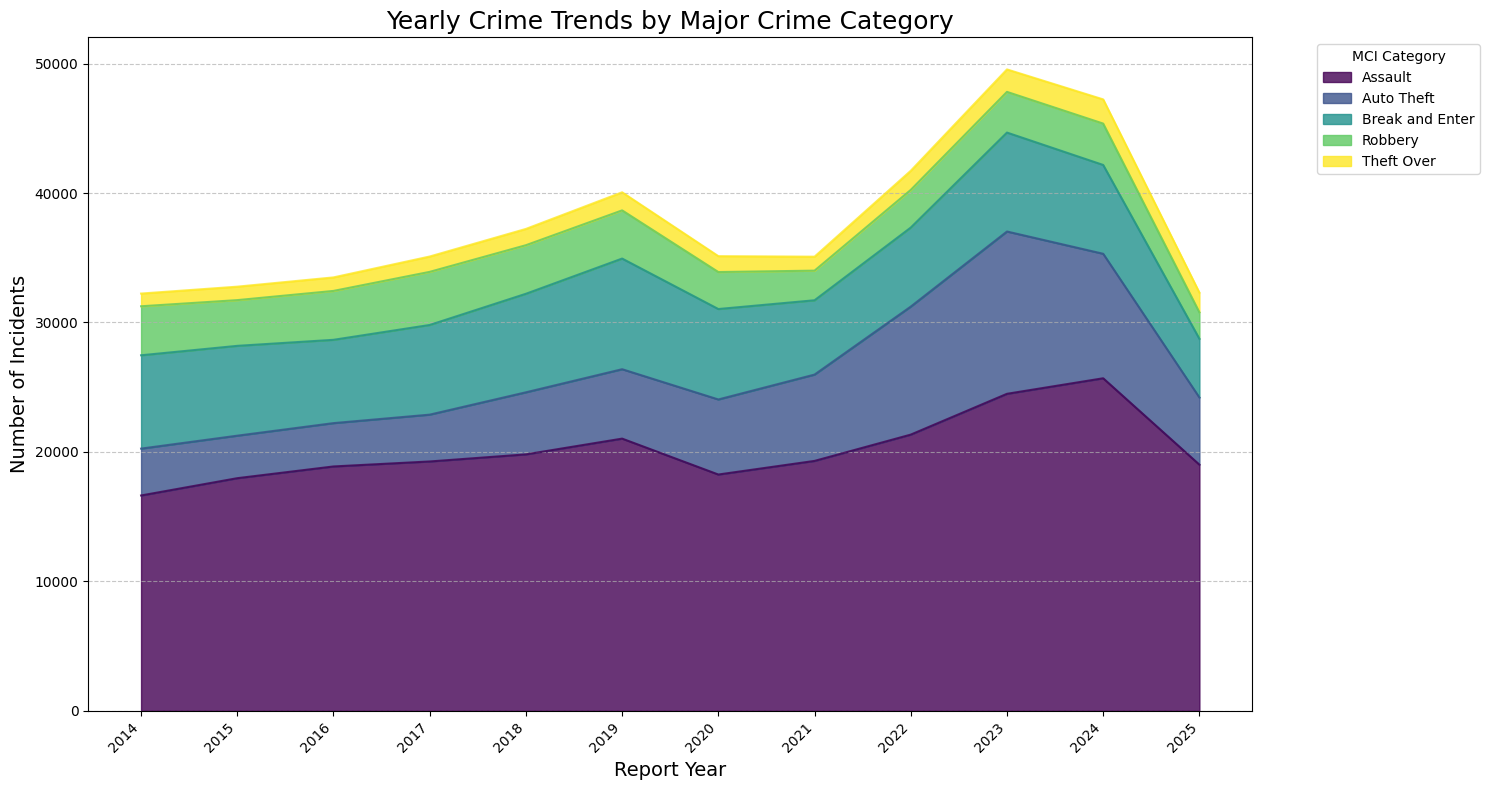

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by REPORT_YEAR and MCI_CATEGORY, then count incidents
yearly_mci_trends = df_crime.groupby(['REPORT_YEAR', 'MCI_CATEGORY']).size().unstack(fill_value=0)

# Plotting the stacked line chart
plt.figure(figsize=(15, 8))
yearly_mci_trends.plot(kind='area', stacked=True, colormap='viridis', alpha=0.8, figsize=(15, 8))

plt.title('Yearly Crime Trends by Major Crime Category', fontsize=18)
plt.xlabel('Report Year', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(yearly_mci_trends.index, rotation=45, ha='right')
plt.legend(title='MCI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# remove white space in data
df_crime['REPORT_DOW'] = df_crime['REPORT_DOW'].str.strip()

In [ ]:
# re-order the 7 days in a week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# order = [day for day in order if day in contigency_frequency.index]

contigency_frequency = pd.crosstab(df_crime['REPORT_DOW'], df_crime['REPORT_HOUR'])
contigency_frequency = contigency_frequency.reindex(order)
contigency_frequency

REPORT_HOUR,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
REPORT_DOW,,,,,,,,,,,,,,,,,,,,,
Monday,1830,1626,1449,1234,1112,1955,2705,3250,3724,3480,...,3612,3729,3428,3188,3470,3354,3158,3077,2623,2354
Tuesday,1559,1379,1268,1067,1150,1907,2625,3176,3475,3345,...,3526,3610,3354,3363,3400,3342,3309,3032,2658,2350
Wednesday,1740,1485,1186,1117,1134,2001,2645,3157,3486,3291,...,3420,3682,3486,3345,3503,3271,3093,2952,2701,2323
Thursday,1595,1579,1358,1139,1051,2004,2734,3165,3447,3355,...,3332,3400,3367,3140,3307,3319,3122,3065,2681,2547
Friday,1795,1600,1476,1253,1164,2047,2732,3151,3498,3173,...,3253,3357,3284,3204,3463,3296,3277,3332,3021,3029
Saturday,2511,2569,2224,1841,1359,1498,1800,2258,2982,2689,...,2945,2859,2860,2803,2845,3082,2972,3097,3048,3029
Sunday,2846,2802,2374,1942,1434,1388,1606,1936,2587,2529,...,2925,2924,2842,2913,2934,2934,3021,2895,2656,2542


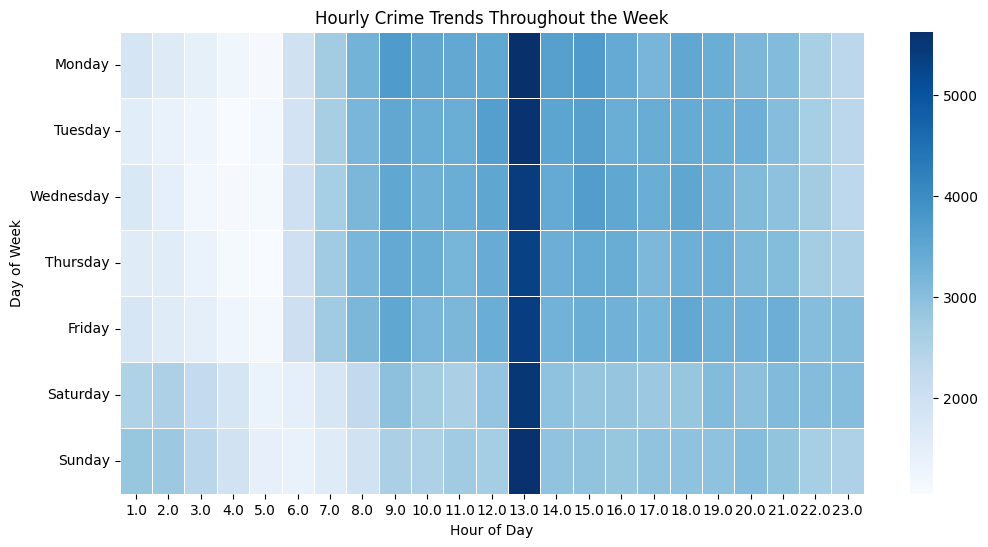

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(contigency_frequency, cmap='Blues',linewidths=0.5)

plt.title("Hourly Crime Trends Throughout the Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

In [ ]:
# real value
contigency = pd.crosstab(df_crime['PREMISES_TYPE'],df_crime['MCI_CATEGORY'])
pd.crosstab(df_crime['PREMISES_TYPE'],df_crime['MCI_CATEGORY'])

# normalized value
contigency_normalized = pd.crosstab(df_crime['PREMISES_TYPE'],df_crime['MCI_CATEGORY'], normalize='columns')
pd.crosstab(df_crime['PREMISES_TYPE'],df_crime['MCI_CATEGORY'], normalize='columns')


MCI_CATEGORY,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
PREMISES_TYPE,,,,,
Apartment,0.313697,0.030781,0.264863,0.084865,0.168797
Commercial,0.153986,0.085357,0.355800,0.278580,0.337973
Educational,0.035070,0.001275,0.016718,0.026618,0.010629
House,0.121129,0.310484,0.307007,0.037383,0.151651
Other,0.077673,0.030415,0.053417,0.036999,0.055232
Outside,0.246652,0.538527,0.000810,0.503209,0.270404
Transit,0.051792,0.003161,0.001386,0.032345,0.005314


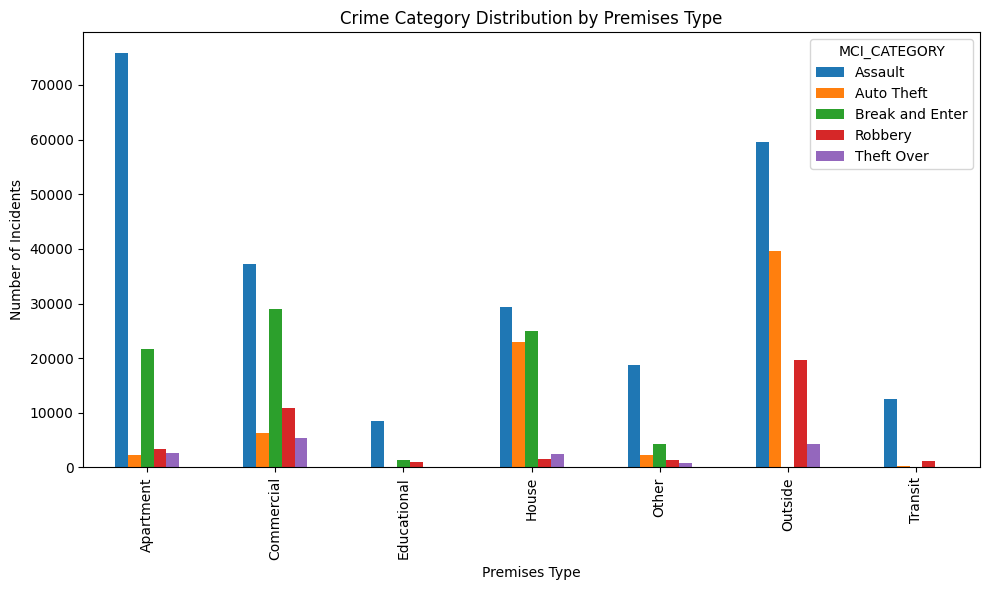

In [ ]:
contigency.plot(kind='bar',figsize=(10,6))
plt.title('Crime Category Distribution by Premises Type')
plt.xlabel('Premises Type')
plt.ylabel('Number of Incidents')

plt.tight_layout()
plt.show()

(0.0, 1.0)

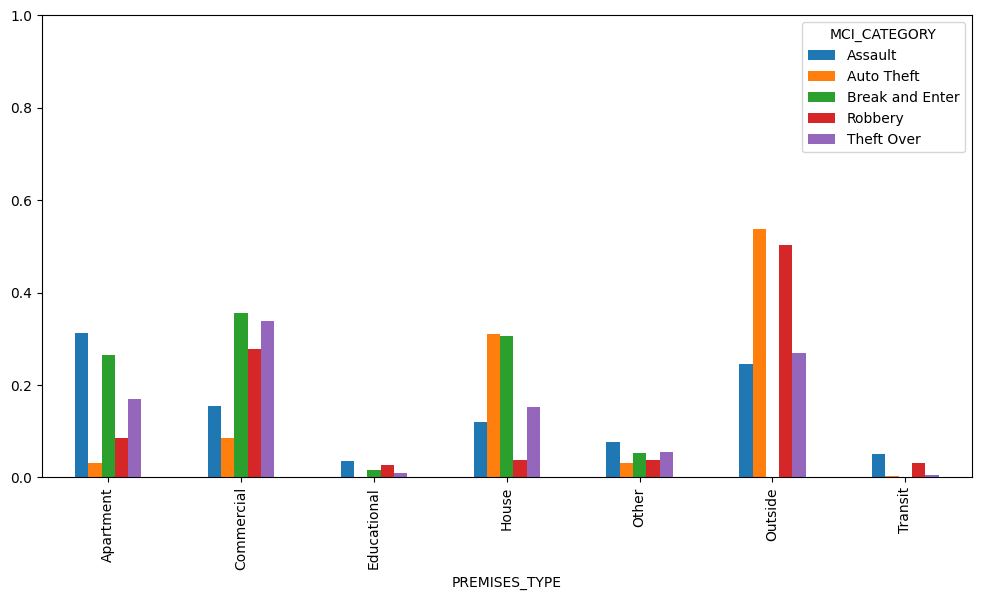

In [ ]:
contigency_normalized.plot(kind='bar',figsize=(12,6))
plt.ylim(0, 1)

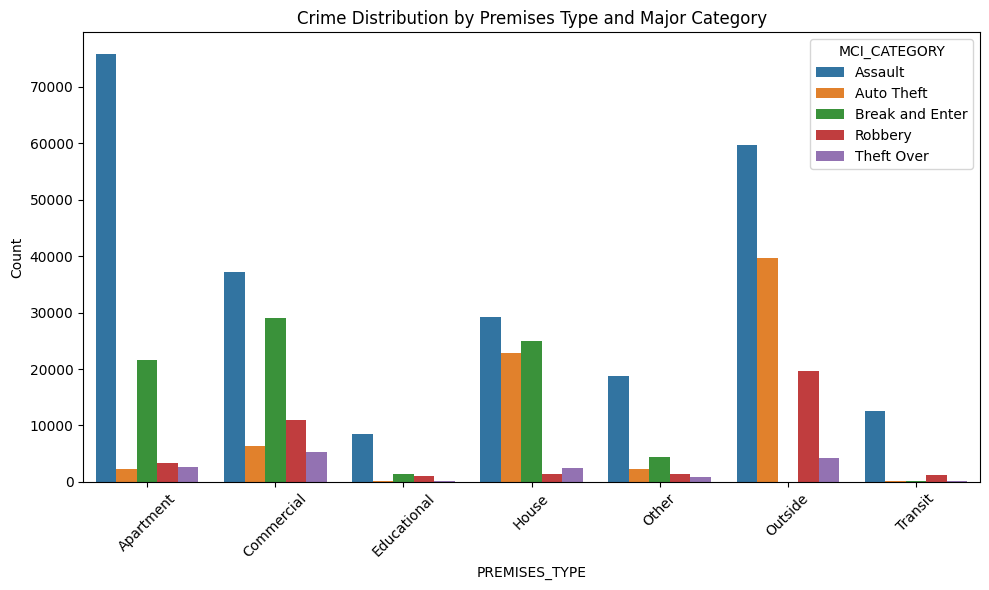

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
premises_mci = df_crime.groupby(['PREMISES_TYPE', 'MCI_CATEGORY']).size().reset_index(name='Count')
sns.barplot(data=premises_mci, x='PREMISES_TYPE', y='Count', hue='MCI_CATEGORY')
plt.title('Crime Distribution by Premises Type and Major Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


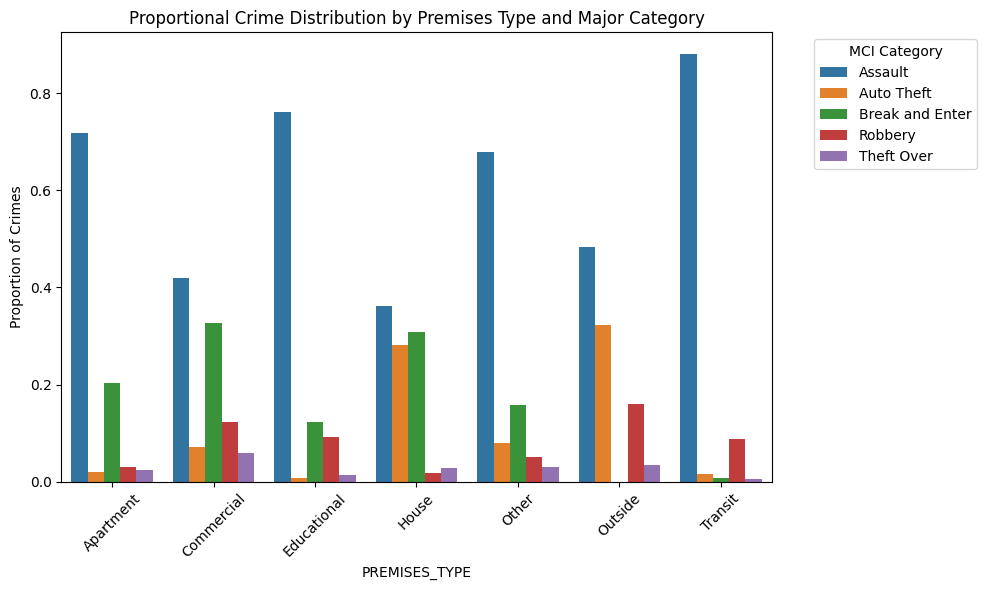

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group and pivot
premises_mci = df_crime.groupby(['PREMISES_TYPE', 'MCI_CATEGORY']).size().unstack(fill_value=0)

# Normalize by row (premises type) to get proportion
premises_mci_norm = premises_mci.div(premises_mci.sum(axis=1), axis=0)

# Convert back to long form for seaborn
premises_mci_norm_long = premises_mci_norm.reset_index().melt(id_vars='PREMISES_TYPE',
                                                              var_name='MCI_CATEGORY',
                                                              value_name='Proportion')

# Plot normalized bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=premises_mci_norm_long, x='PREMISES_TYPE', y='Proportion', hue='MCI_CATEGORY')
plt.title('Proportional Crime Distribution by Premises Type and Major Category')
plt.ylabel('Proportion of Crimes')
plt.xticks(rotation=45)
plt.legend(title='MCI Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


In [ ]:
top_5_mci_categories = df_crime['MCI_CATEGORY'].value_counts().head(5)
print("Top 5 MCI Categories:")
print(top_5_mci_categories)

Top 5 MCI Categories:
MCI_CATEGORY
Assault            241717
Break and Enter     81529
Auto Theft          73714
Robbery             39109
Theft Over          15806
Name: count, dtype: int64


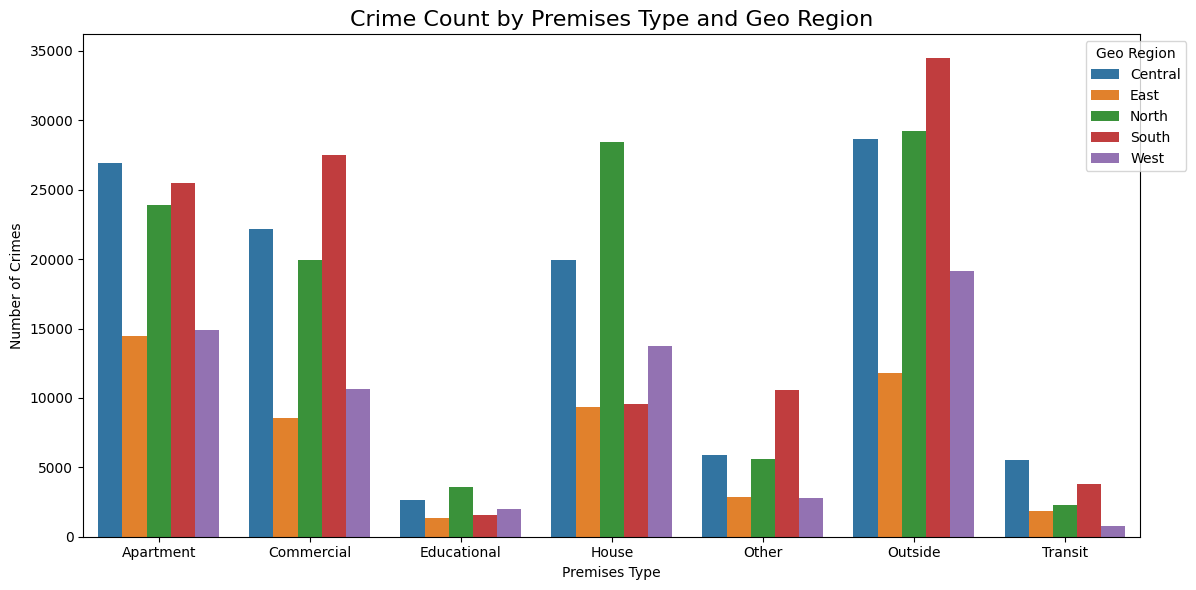

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
region_premises = df_crime.groupby(['Geo_Region', 'PREMISES_TYPE']).size().reset_index(name='Count')

# Plot grouped bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=region_premises, x='PREMISES_TYPE', y='Count', hue='Geo_Region')
plt.title('Crime Count by Premises Type and Geo Region', fontsize=16)
plt.ylabel('Number of Crimes')
plt.xlabel('Premises Type')
plt.legend(title='Geo Region', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


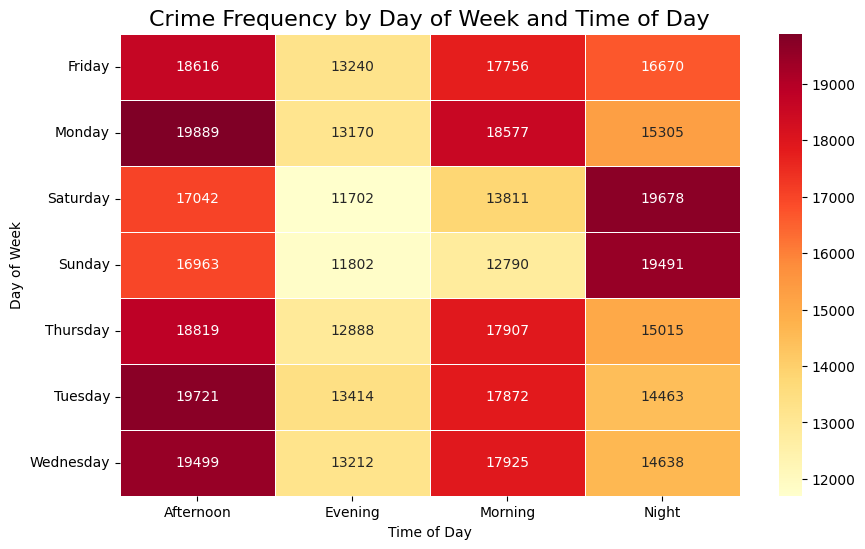

In [ ]:
# Bin hours into time of day
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_crime['Time_of_Day'] = df_crime['REPORT_HOUR'].apply(time_of_day)

heat_data = df_crime.groupby(['REPORT_DOW','Time_of_Day']).size().reset_index(name='Count')
heat_pivot = heat_data.pivot(index='REPORT_DOW', columns='Time_of_Day', values='Count')

plt.figure(figsize=(10,6))
sns.heatmap(heat_pivot, cmap="YlOrRd", linewidths=0.5, annot=True, fmt='d')
plt.title("Crime Frequency by Day of Week and Time of Day", fontsize=16)
plt.xlabel("Time of Day")
plt.ylabel("Day of Week")
plt.show()


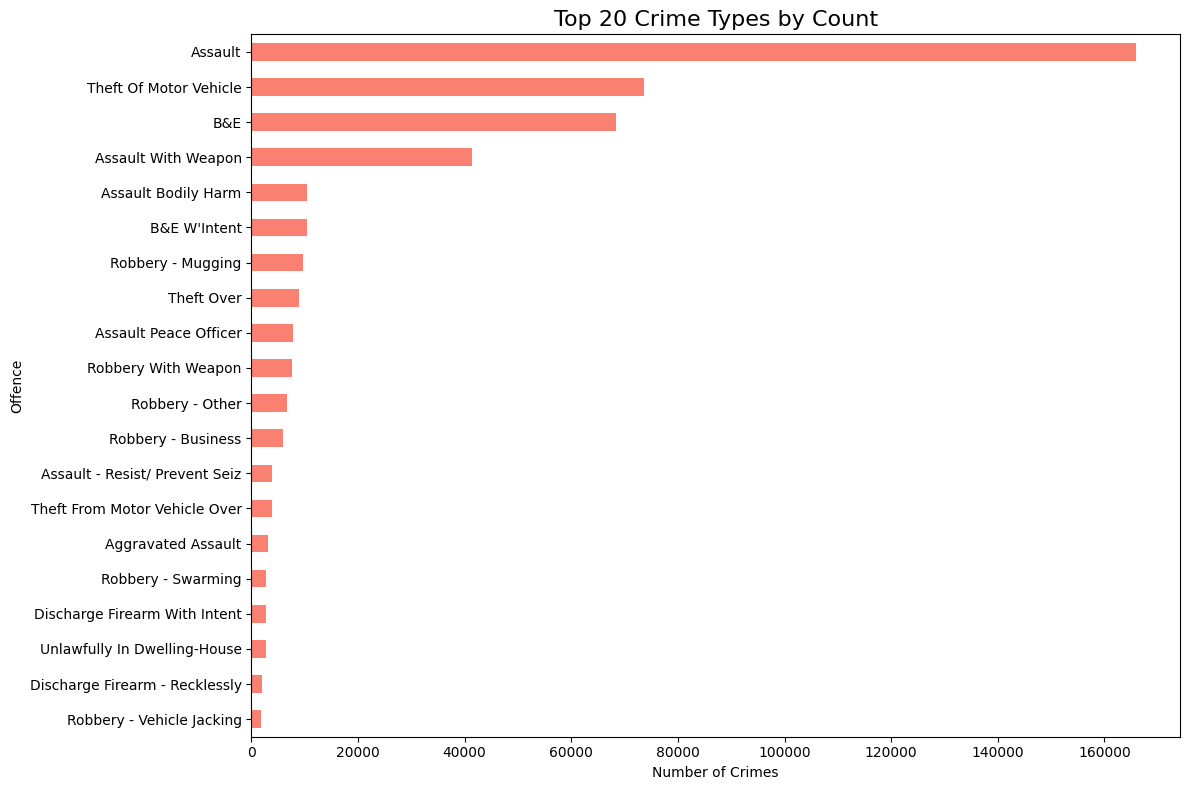

In [ ]:
offence_counts = df_crime['OFFENCE'].value_counts().head(20)  # top 20 offences

plt.figure(figsize=(12,8))
offence_counts.sort_values().plot(kind='barh', color='salmon')
plt.title("Top 20 Crime Types by Count", fontsize=16)
plt.xlabel("Number of Crimes")
plt.ylabel("Offence")
plt.tight_layout()
plt.show()

# **DBSCAN**

Cluster sizes:
 cluster
-1        7
 0    90368
Name: count, dtype: int64

Noise (-1) points: 7


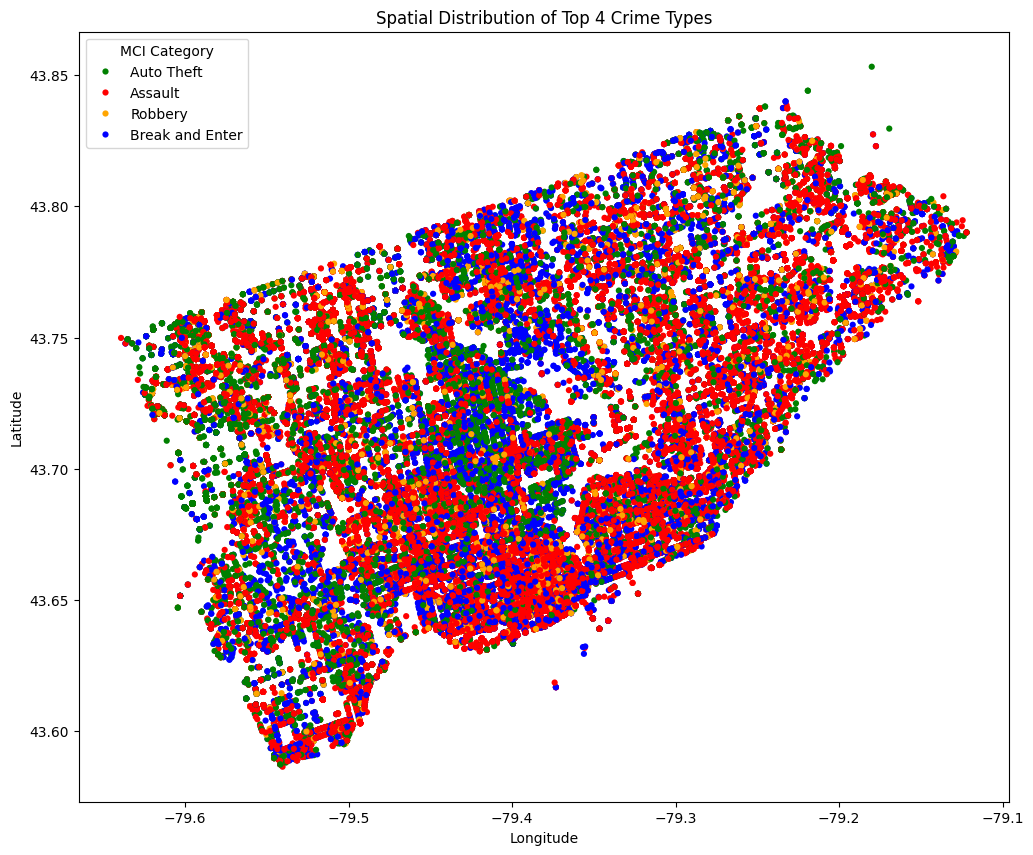

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# ----------------------------------------
# 0. Ensure df_crime is loaded
# ----------------------------------------
if 'df_crime' not in locals():
    print("Error: df_crime DataFrame is not defined. Please load your dataset first.")
else:
    # ----------------------------------------
    # 1. Sample 20% of the data to avoid RAM crash
    # ----------------------------------------
    df_db_sampled = df_crime.sample(frac=0.2, random_state=42).copy()

    # Keep only relevant columns
    df_db = df_db_sampled[['LONG_WGS84', 'LAT_WGS84', 'MCI_CATEGORY']].dropna()

    # ----------------------------------------
    # 2. Scale coords (fix: separate scaling)
    # ----------------------------------------
    scaler_lon = StandardScaler()
    scaler_lat = StandardScaler()

    df_db['lon_scaled'] = scaler_lon.fit_transform(df_db[['LONG_WGS84']])
    df_db['lat_scaled'] = scaler_lat.fit_transform(df_db[['LAT_WGS84']])

    coords_scaled = df_db[['lon_scaled', 'lat_scaled']].values

    # ----------------------------------------
    # 3. Fixed DBSCAN clustering
    # ----------------------------------------
    # eps increased because Haversine created too many small clusters
    # 0.2–0.35 works best for Toronto after scaling
    db = DBSCAN(eps=0.25, min_samples=60)
    df_db['cluster'] = db.fit_predict(coords_scaled)

    print("Cluster sizes:\n", df_db['cluster'].value_counts().sort_index())
    print("\nNoise (-1) points:", (df_db['cluster'] == -1).sum())

    # ----------------------------------------
    # 4. Top 4 crime categories for analysis
    # ----------------------------------------
    top4_crimes = ["Assault", "Break and Enter", "Auto Theft", "Robbery"]

    color_map = {
        "Assault": "red",
        "Break and Enter": "blue",
        "Auto Theft": "green",
        "Robbery": "orange"
    }

    df_db['crime_color'] = df_db["MCI_CATEGORY"].map(color_map)
    df_db['crime_color'] = df_db['crime_color'].fillna("gray")



    # ----------------------------------------
    # 6. Individual heat-style plot of top-4 crimes only
    # ----------------------------------------
    df_top4 = df_db[df_db["MCI_CATEGORY"].isin(top4_crimes)]

    plt.figure(figsize=(12, 10))
    sns.scatterplot(
        x=df_top4["LONG_WGS84"],
        y=df_top4["LAT_WGS84"],
        hue=df_top4["MCI_CATEGORY"],
        palette=color_map,
        s=20,
        linewidth=0
    )

    plt.title("Spatial Distribution of Top 4 Crime Types")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(title="MCI Category")
    plt.show()


Parameters used: eps=0.04, min_samples=100

Cluster sizes:
 cluster
-1    45718
 0    19807
 1      363
 2      183
 3      278
 4      138
 5      228
 6      641
 7     1297
 8      635
Name: count, dtype: int64

Noise (-1) points: 45718

Cluster density (points per scaled area unit):
Cluster 0: 22146.09 (Size: 19807)
Cluster 1: 25698.51 (Size: 363)
Cluster 41: 16779.07 (Size: 208)
Cluster 3: 29049.48 (Size: 278)
Cluster 5: 11929.75 (Size: 228)
Cluster 34: 19320.33 (Size: 239)
Cluster 6: 21643.45 (Size: 641)
Cluster 7: 15002.35 (Size: 1297)
Cluster 8: 635000000000.00 (Size: 635)
Cluster 9: 31547.10 (Size: 282)
Cluster 29: 15109.31 (Size: 547)
Cluster 11: 20771.01 (Size: 525)
Cluster 36: 12102.54 (Size: 841)
Cluster 39: 149657.75 (Size: 257)
Cluster 12: 16954.09 (Size: 483)
Cluster 13: 22442.13 (Size: 277)
Cluster 14: 41765.46 (Size: 2332)
Cluster 15: 26509.44 (Size: 350)
Cluster 27: 31686.67 (Size: 426)
Cluster 21: 22371.18 (Size: 339)
Cluster 22: 34637.73 (Size: 214)
Cluster 23: 318

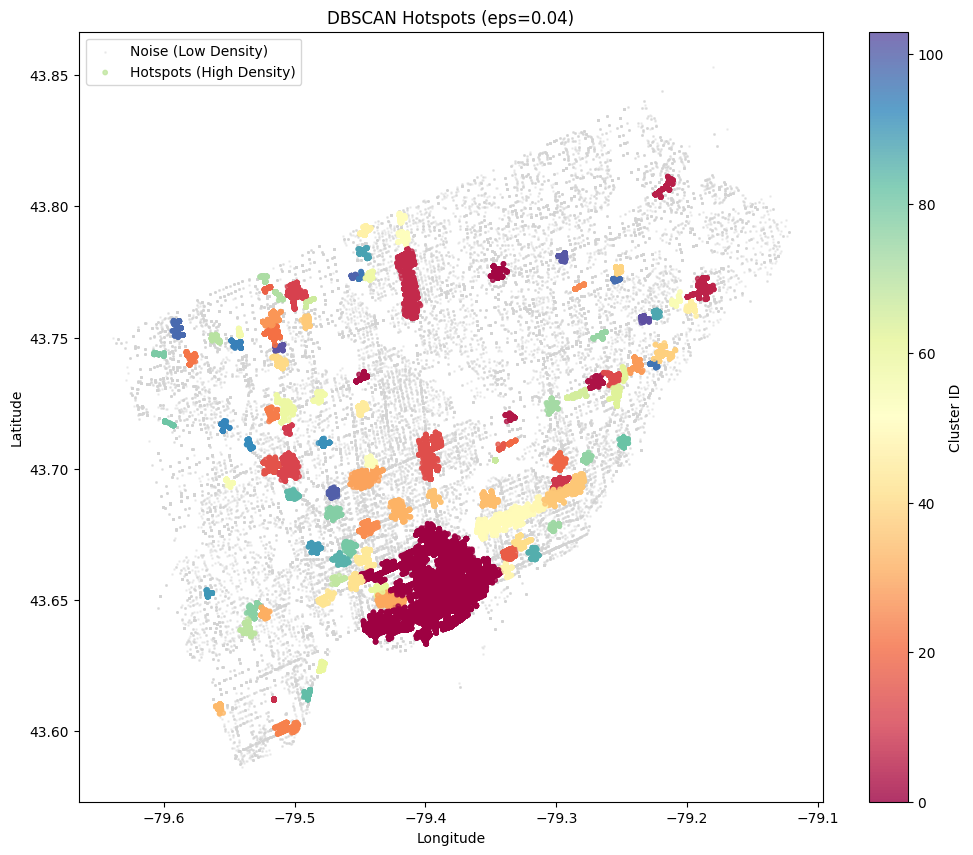


K-fold-like clustering stability (random 5 splits):
Split 1: Silhouette = 0.2899 (Clusters: 71)
Split 2: Silhouette = 0.3306 (Clusters: 70)
Split 3: Silhouette = 0.3643 (Clusters: 68)
Split 4: Silhouette = 0.3328 (Clusters: 72)
Split 5: Silhouette = 0.3581 (Clusters: 69)
Average silhouette over splits: 0.3351


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# ----------------------------------------
# 0. Ensure df_crime is loaded
# ----------------------------------------
if 'df_crime' not in locals():
    print("Error: df_crime DataFrame is not defined.")
else:
    # ----------------------------------------
    # 1. Sample data
    # ----------------------------------------
    # Randomly sample 20% of the original crime dataset for faster processing
    df_db_sampled = df_crime.sample(frac=0.2, random_state=42).copy()
    # Drop rows with missing values
    df_db = df_db_sampled[['LONG_WGS84', 'LAT_WGS84', 'MCI_CATEGORY']].dropna()

    # ----------------------------------------
    # 2. Scale coords
    # ----------------------------------------
    # Create separate scalers for longitude and latitude
    # Fit the scalers and transform the longitude and latitude values
    scaler_lon = StandardScaler()
    scaler_lat = StandardScaler()
    df_db['lon_scaled'] = scaler_lon.fit_transform(df_db[['LONG_WGS84']])
    df_db['lat_scaled'] = scaler_lat.fit_transform(df_db[['LAT_WGS84']])
    coords_scaled = df_db[['lon_scaled', 'lat_scaled']].values

    # ----------------------------------------
    # 3. DBSCAN (TUNED PARAMETERS)
    # ----------------------------------------
    # eps=0.04: Very small radius to break the city into neighborhoods
    # min_samples=100: Requires high density to form a cluster
    EPS_VAL = 0.04
    MIN_SAMPLES_VAL = 100

    db = DBSCAN(eps=EPS_VAL, min_samples=MIN_SAMPLES_VAL)
    df_db['cluster'] = db.fit_predict(coords_scaled)

    # ----------------------------------------
    # 4. Cluster info
    # ----------------------------------------
    print(f"Parameters used: eps={EPS_VAL}, min_samples={MIN_SAMPLES_VAL}")
    print("\nCluster sizes:\n", df_db['cluster'].value_counts().sort_index().head(10)) # Show top 10 for brevity
    print("\nNoise (-1) points:", (df_db['cluster'] == -1).sum())

    # ----------------------------------------
    # 5. Calculate cluster density
    # ----------------------------------------
    print("\nCluster density (points per scaled area unit):")
    clusters = df_db['cluster'].unique()
    for cl in clusters:
        if cl == -1: continue
        subset = df_db[df_db['cluster'] == cl]
        # Avoid zero area division by adding tiny epsilon
        area = ((subset['lon_scaled'].max() - subset['lon_scaled'].min()) * (subset['lat_scaled'].max() - subset['lat_scaled'].min())) + 1e-9
        density = len(subset)/area
        # Only print major clusters to reduce clutter
        if len(subset) > 200:
            print(f"Cluster {cl}: {density:.2f} (Size: {len(subset)})")

    # ----------------------------------------
    # 6. Silhouette Score
    # ----------------------------------------
    labels = df_db['cluster'].values
    unique_labels = set(labels)
    if -1 in unique_labels: unique_labels.remove(-1)

    if len(unique_labels) > 1:
        mask = df_db['cluster'] != -1
        # Sample the silhouette score if dataset is huge (faster)
        if len(coords_scaled[mask]) > 10000:
             sample_indices = np.random.choice(len(coords_scaled[mask]), 10000, replace=False)
             sil_score = silhouette_score(coords_scaled[mask][sample_indices], labels[mask][sample_indices])
             print(f"\nSilhouette Score (Sampled, excluding noise): {sil_score:.4f}")
        else:
             sil_score = silhouette_score(coords_scaled[mask], labels[mask])
             print(f"\nSilhouette Score (excluding noise): {sil_score:.4f}")
    else:
        print("\nNot enough clusters for Silhouette Score.")

    # ----------------------------------------
    # 7. Visualization
    # ----------------------------------------
    plt.figure(figsize=(12, 10))
    # Filter noise for cleaner plot (optional) or plot them small grey
    noise = df_db[df_db['cluster'] == -1]
    clustered = df_db[df_db['cluster'] != -1]

    plt.scatter(noise['LONG_WGS84'], noise['LAT_WGS84'], s=1, c='lightgrey', alpha=0.3, label='Noise')
    scatter = plt.scatter(clustered['LONG_WGS84'], clustered['LAT_WGS84'],
                          c=clustered['cluster'], cmap='Spectral', s=10, alpha=0.8)

    plt.title(f"DBSCAN Hotspots (eps={EPS_VAL})")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.colorbar(scatter, label='Cluster ID')
    plt.legend(['Noise (Low Density)', 'Hotspots (High Density)'])
    plt.show()

    # ----------------------------------------
    # 8. K-fold-like Stability (FIXED)
    # ----------------------------------------
    print("\nK-fold-like clustering stability (random 5 splits):")
    n_splits = 5
    sil_scores = []
    for i in range(n_splits):
        sample = df_db.sample(frac=0.8, random_state=i)
        coords_sample = sample[['lon_scaled', 'lat_scaled']].values

        # --- FIX: Use the SAME parameters as above ---
        db_sample = DBSCAN(eps=EPS_VAL, min_samples=MIN_SAMPLES_VAL)
        labels_sample = db_sample.fit_predict(coords_sample)

        unique_s = set(labels_sample)
        if -1 in unique_s: unique_s.remove(-1)

        if len(unique_s) > 1:
            mask = labels_sample != -1
            # Sample for speed if needed
            if len(coords_sample[mask]) > 10000:
                idx = np.random.choice(len(coords_sample[mask]), 5000, replace=False)
                sil = silhouette_score(coords_sample[mask][idx], labels_sample[mask][idx])
            else:
                sil = silhouette_score(coords_sample[mask], labels_sample[mask])
            sil_scores.append(sil)
            print(f"Split {i+1}: Silhouette = {sil:.4f} (Clusters: {len(unique_s)})")
        else:
            print(f"Split {i+1}: < 2 clusters found.")

    if sil_scores:
        print(f"Average silhouette over splits: {np.mean(sil_scores):.4f}")

In [ ]:
# 1. Calculate counts
total_points = len(df_db)
noise_points = (df_db['cluster'] == -1).sum()
clustered_points = total_points - noise_points

# 2. Calculate percentages
noise_ratio = noise_points / total_points
clustered_ratio = clustered_points / total_points

# 3. Print Report
print(f"=== Data vs Noise Ratio ===")
print(f"Total Data Points:   {total_points}")
print(f"Noise Points (-1):   {noise_points} ({noise_ratio:.2%})")
print(f"Clustered Points:    {clustered_points} ({clustered_ratio:.2%})")

# 4. Interpretation
if noise_ratio > 0.5:
    print("\nInterpretation: High Noise (>50%). This is effectively filtering out 'random' crimes to focus only on the strongest hotspots.")
elif noise_ratio < 0.1:
    print("\nInterpretation: Low Noise (<10%). The model is likely merging distinct areas together (try decreasing eps).")
else:
    print("\nInterpretation: Balanced Ratio. You have distinct clusters while excluding outliers.")

=== Data vs Noise Ratio ===
Total Data Points:   90375
Noise Points (-1):   45718 (50.59%)
Clustered Points:    44657 (49.41%)

Interpretation: High Noise (>50%). This is effectively filtering out 'random' crimes to focus only on the strongest hotspots.


# **APRIORI ALGORITHM**

In [ ]:
!pip install mlxtend


Preparing data for Mining...
Data ready. Transformed into 17 binary features.
Running Apriori (Min Support: 0.01)...
Generated 492 rules for ALL crimes.

CRIME-BY-CRIME INTELLIGENCE REPORT

🔎 ANALYZING: ASSAULT
   🏆 STRONGEST PREDICTOR: Location_Educational
   📊 Lift: 2.31x (More likely than random chance)
   🎯 Confidence: 46.8% (Chance of being Assault in this scenario)

🔎 ANALYZING: ROBBERY
   🏆 STRONGEST PREDICTOR: Location_Outside
   📊 Lift: 2.04x (More likely than random chance)
   🎯 Confidence: 17.6% (Chance of being Robbery in this scenario)
   📝 Insight: Robbery is an opportunistic crime of open spaces.

🔎 ANALYZING: BREAK AND ENTER
   🏆 STRONGEST PREDICTOR: Time_Night
   📊 Lift: 3.29x (More likely than random chance)
   🎯 Confidence: 59.4% (Chance of being Break and Enter in this scenario)
   📝 Insight: Break and Enter is specifically a nocturnal activity.

🔎 ANALYZING: AUTO THEFT
   🏆 STRONGEST PREDICTOR: Location_House
   📊 Lift: 2.72x (More likely than random chance)
   🎯 C

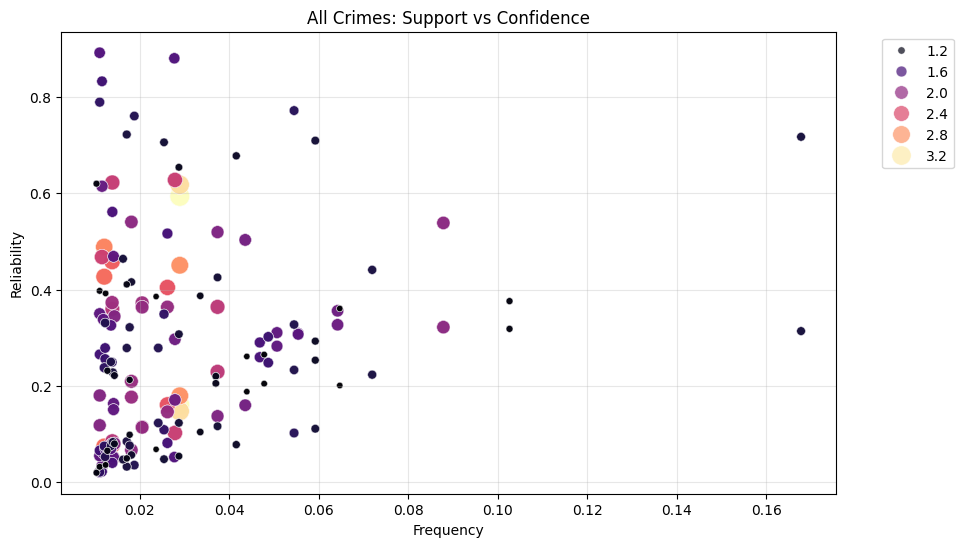

In [ ]:
### APRIORI

# ==========================================
# ASSOCIATION RULE MINING (ALL CRIMES)
# Goal: Find the strongest predictor for EVERY crime type
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import warnings

# 1. SUPPRESS WARNINGS
warnings.filterwarnings('ignore')

# ----------------------------------------
# 2. DATA PREPARATION
# ----------------------------------------
if 'df_crime' not in locals():
    print("Error: df_crime is not defined. Please run your data loading cell first.")
else:
    print("Preparing data for Mining...")

    # Feature Engineering
    def get_time_of_day(hour):
        if 0 <= hour < 6: return 'Night'
        elif 6 <= hour < 12: return 'Morning'
        elif 12 <= hour < 18: return 'Afternoon'
        else: return 'Evening'

    df_mining = pd.DataFrame()
    df_mining['Crime'] = df_crime['MCI_CATEGORY']
    df_mining['Location'] = df_crime['PREMISES_TYPE']
    df_mining['Time'] = df_crime['OCC_HOUR'].apply(get_time_of_day)
    df_mining['Day'] = df_crime['OCC_DOW'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

    df_mining.dropna(inplace=True)

    # ONE-HOT ENCODING
    basket = pd.get_dummies(df_mining).astype(bool)
    print(f"Data ready. Transformed into {basket.shape[1]} binary features.")

    # ----------------------------------------
    # 3. RUN APRIORI (THE MATH)
    # ----------------------------------------
    # min_support = 0.01 (1%) finds patterns that happen frequently enough to matter
    support_threshold = 0.01

    print(f"Running Apriori (Min Support: {support_threshold})...")
    frequent_itemsets = apriori(basket, min_support=support_threshold, use_colnames=True)

    if frequent_itemsets.empty:
        print("No patterns found! Try lowering support.")
    else:
        # Generate Rules
        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)
        rules = rules.sort_values(['lift', 'confidence'], ascending=[False, False])

        print(f"Generated {len(rules)} rules for ALL crimes.")

        # ----------------------------------------
        # 4. DETECTIVE MODE: LOOP THROUGH ALL CRIMES
        # ----------------------------------------
        target_crimes = ['Assault', 'Robbery', 'Break and Enter', 'Auto Theft']

        print("\n" + "="*60)
        print("CRIME-BY-CRIME INTELLIGENCE REPORT")
        print("="*60)

        for crime in target_crimes:
            crime_col_name = f"Crime_{crime}"

            # Filter rules where the CONSEQUENT (Result) is this specific crime
            specific_rules = rules[
                rules['consequents'].astype(str).str.contains(crime_col_name)
            ]

            print(f"\n🔎 ANALYZING: {crime.upper()}")

            if not specific_rules.empty:
                # Get the #1 strongest rule
                top_rule = specific_rules.iloc[0]

                # Clean up the text for display
                ant = list(top_rule['antecedents'])[0]

                print(f"   🏆 STRONGEST PREDICTOR: {ant}")
                print(f"   📊 Lift: {top_rule['lift']:.2f}x (More likely than random chance)")
                print(f"   🎯 Confidence: {top_rule['confidence']*100:.1f}% (Chance of being {crime} in this scenario)")

                # Interpretation logic
                if "Apartment" in str(ant):
                    print(f"   📝 Insight: {crime} is heavily linked to high-density residential living.")
                elif "Outside" in str(ant):
                    print(f"   📝 Insight: {crime} is an opportunistic crime of open spaces.")
                elif "Commercial" in str(ant):
                    print(f"   📝 Insight: {crime} is driven by business hours/retail areas.")
                elif "Night" in str(ant):
                    print(f"   📝 Insight: {crime} is specifically a nocturnal activity.")
            else:
                print("   ❌ No strong specific rules found (Lift < 1.1). This crime might be too random or rare.")

        # ----------------------------------------
        # 5. VISUALIZATION
        # ----------------------------------------
        plt.figure(figsize=(10, 6))
        sns.scatterplot(
            x="support", y="confidence",
            size="lift", hue="lift",
            data=rules, palette="magma",
            sizes=(20, 200), alpha=0.7
        )
        plt.title('All Crimes: Support vs Confidence')
        plt.xlabel('Frequency')
        plt.ylabel('Reliability')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
        plt.grid(True, alpha=0.3)
        plt.show()

In [ ]:
# ==========================================
# APRIORI STABILITY CHECK (Pseudo K-Fold)
# Goal: Prove that our rules are robust across random subsets
# ==========================================

from sklearn.model_selection import KFold
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# 1. SETUP
# Ensure df_mining exists from previous steps
if 'df_mining' not in locals():
    print("⚠️ Error: Please run the Data Preparation block first.")
else:
    # Parameters
    k = 5  # 5-fold stability check
    support_threshold = 0.01
    metric_threshold = 1.1
    target_crimes = ['Assault', 'Robbery', 'Break and Enter', 'Auto Theft']

    # One-hot encoding
    basket_full = pd.get_dummies(df_mining).astype(bool)

    # Initialize K-Fold
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    print(f"Running {k}-Fold Stability Analysis...")
    print(f"(This may take a moment as we run Apriori {k} times...)")

    fold_results = []

    # 2. RUN LOOP
    for fold, (train_index, test_index) in enumerate(kf.split(basket_full), 1):
        # Select the random subset (80% of data)
        subset = basket_full.iloc[train_index]

        # Run Apriori on this subset
        frequent_itemsets = apriori(subset, min_support=support_threshold, use_colnames=True)

        if frequent_itemsets.empty:
            print(f"Fold {fold}: No rules found.")
            continue

        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=metric_threshold)

        # Find top predictor for each crime in this subset
        fold_top_rules = {}
        for crime in target_crimes:
            crime_col = f"Crime_{crime}"
            # Filter for rules leading to this crime
            specific = rules[rules['consequents'].astype(str).str.contains(crime_col)]

            if not specific.empty:
                # Pick the single strongest rule by Lift
                top = specific.sort_values(['lift'], ascending=False).iloc[0]
                predictor = list(top['antecedents'])[0]
                fold_top_rules[crime] = predictor
            else:
                fold_top_rules[crime] = "None"

        fold_results.append(fold_top_rules)
        print(f"Fold {fold} Complete.")

    # 3. AGGREGATE RESULTS
    print("\n" + "="*50)
    print("STABILITY REPORT (Generalizability)")
    print("="*50)

    for crime in target_crimes:
        predictors = [f[crime] for f in fold_results]

        # Find the most common predictor across folds
        if predictors:
            most_common = max(set(predictors), key=predictors.count)
            count = predictors.count(most_common)
            consistency = (count / k) * 100

            print(f"\nTarget: {crime}")
            print(f"  Dominant Predictor: {most_common}")
            print(f"  Stability Score:    {consistency:.0f}% ({count}/{k} folds)")

            if consistency == 100:
                print("  VERDICT: 💎 Rock Solid Pattern")
            elif consistency >= 60:
                print("  VERDICT: ✅ Stable Pattern")
            else:
                print("  VERDICT: ⚠️ Unstable / Random Noise")

Running 5-Fold Stability Analysis...
(This may take a moment as we run Apriori 5 times...)
Fold 1 Complete.
Fold 2 Complete.
Fold 3 Complete.
Fold 4 Complete.
Fold 5 Complete.

STABILITY REPORT (Generalizability)

Target: Assault
  Dominant Predictor: Location_Educational
  Stability Score:    100% (5/5 folds)
  VERDICT: 💎 Rock Solid Pattern

Target: Robbery
  Dominant Predictor: Location_Outside
  Stability Score:    100% (5/5 folds)
  VERDICT: 💎 Rock Solid Pattern

Target: Break and Enter
  Dominant Predictor: Time_Night
  Stability Score:    100% (5/5 folds)
  VERDICT: 💎 Rock Solid Pattern

Target: Auto Theft
  Dominant Predictor: Location_House
  Stability Score:    100% (5/5 folds)
  VERDICT: 💎 Rock Solid Pattern


Generating Rules for Visuals...
Ready to plot 74 filtered rules.


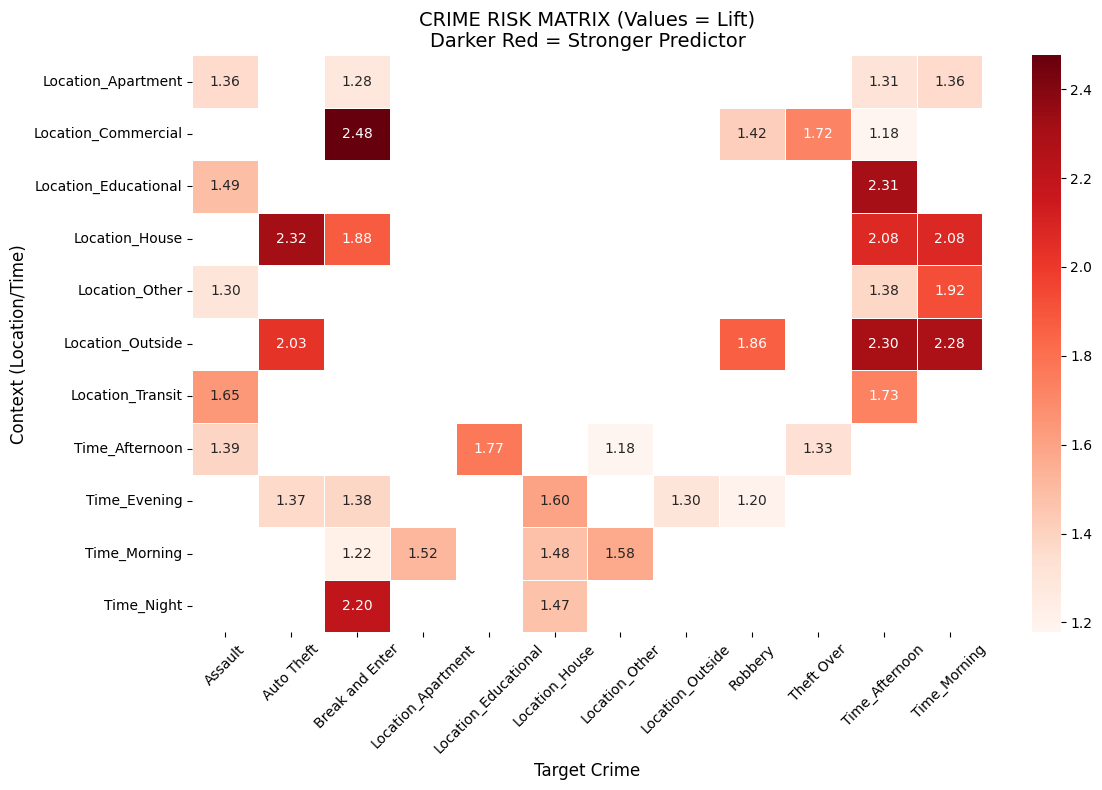

In [ ]:
# ==========================================
# ADVANCED APRIORI VISUALIZATIONS
# 1. Risk Matrix (Heatmap) - Best for readability
# 2. Crime Web (Network Graph) - Best for showing connections
# ==========================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import warnings

warnings.filterwarnings('ignore')

# ----------------------------------------
# 1. PREPARE DATA & RULES (Quick Re-run)
# ----------------------------------------
# Ensure df_crime is loaded
if 'df_crime' not in locals():
    print("Please load df_crime first!")
else:
    print("Generating Rules for Visuals...")

    # Fast Feature Engineering
    def get_time(x):
        if 0<=x<6: return 'Night'
        elif 6<=x<12: return 'Morning'
        elif 12<=x<18: return 'Afternoon'
        else: return 'Evening'

    df_viz = pd.DataFrame()
    df_viz['Crime'] = df_crime['MCI_CATEGORY']
    df_viz['Location'] = df_crime['PREMISES_TYPE']
    df_viz['Time'] = df_crime['OCC_HOUR'].apply(get_time)

    # One-Hot & Apriori
    basket = pd.get_dummies(df_viz).astype(bool)
    frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)

    # Filter: We only want rules where the Result (Consequent) is a CRIME
    # This cleans up the charts so arrows point TO crimes, not FROM crimes
    crime_cols = [c for c in basket.columns if 'Crime_' in c]

    def is_crime_result(x):
        return any(c in x for c in crime_cols)

    # Keep only rules leading to crimes
    rules_viz = rules[rules['consequents'].apply(is_crime_result)].copy()

    # Convert frozen sets to string names for plotting
    rules_viz['Antecedent_Name'] = rules_viz['antecedents'].apply(lambda x: list(x)[0])
    rules_viz['Consequent_Name'] = rules_viz['consequents'].apply(lambda x: list(x)[0].replace('Crime_', ''))

    print(f"Ready to plot {len(rules_viz)} filtered rules.")

    # ==========================================
    # VISUAL 1: THE RISK MATRIX (HEATMAP)
    # ==========================================
    # Pivot the data: Rows=Context, Cols=Crime, Values=Lift
    matrix = rules_viz.pivot_table(index='Antecedent_Name',
                                 columns='Consequent_Name',
                                 values='lift')

    plt.figure(figsize=(12, 8))
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap="Reds", linewidths=0.5)
    plt.title('CRIME RISK MATRIX (Values = Lift)\nDarker Red = Stronger Predictor', fontsize=14)
    plt.ylabel('Context (Location/Time)', fontsize=12)
    plt.xlabel('Target Crime', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



# DECISION TREE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# -----------------------------
# 0. Load Data Check
# -----------------------------
if 'df_crime' not in locals():
    print("⚠️ df_crime not found. Please load your dataset first.")
else:
    print("Starting Decision Tree Feature Experiments...\n")

    # -----------------------------
    # 1. Feature Engineering
    # -----------------------------
    df_model = df_crime.copy().dropna(subset=['OCC_YEAR','OCC_MONTH','OCC_DOW','OCC_HOUR','PREMISES_TYPE','MCI_CATEGORY'])

    # Encode categorical columns
    label_cols = ['OCC_MONTH', 'OCC_DOW', 'PREMISES_TYPE', 'DIVISION', 'HOOD_158']
    for col in label_cols:
        if col in df_model.columns:
            df_model[col+'_Enc'] = LabelEncoder().fit_transform(df_model[col].astype(str))

    # Hour cyclic encoding
    df_model['hour_sin'] = np.sin(2 * np.pi * df_model['OCC_HOUR']/24)
    df_model['hour_cos'] = np.cos(2 * np.pi * df_model['OCC_HOUR']/24)

    # Weekend flag
    df_model['Is_Weekend'] = df_model['OCC_DOW'].isin(['Saturday','Sunday']).astype(int)


    # Neighborhood frequency
    if 'HOOD_158' in df_model.columns:
        hood_freq = df_model['HOOD_158'].value_counts(normalize=True)
        df_model['HOOD_FREQ'] = df_model['HOOD_158'].map(hood_freq)

    # -----------------------------
    # 2. Define Feature Combinations to Try
    # -----------------------------
    feature_sets = {
        "Basic Time+Premises": ['OCC_YEAR','OCC_MONTH_Enc','OCC_DOW_Enc','OCC_HOUR','PREMISES_TYPE_Enc'],
        "Time + Premises + Division": ['OCC_YEAR','OCC_MONTH_Enc','OCC_DOW_Enc','OCC_HOUR','PREMISES_TYPE_Enc','DIVISION_Enc'],
        "Time Cyclical + Premises": ['OCC_YEAR','hour_sin','hour_cos','PREMISES_TYPE_Enc'],
        "Location + Premises": ['LAT_WGS84','LONG_WGS84','HOOD_Enc','PREMISES_TYPE_Enc'],
        # "Full Combo": ['LAT_WGS84','LONG_WGS84','HOOD_Enc','PREMISES_TYPE_Enc','hour_sin','hour_cos','OCC_YEAR','Is_Weekend']
    }

    # Encode target
    le_target = LabelEncoder()
    y = le_target.fit_transform(df_model['MCI_CATEGORY'])

    # -----------------------------
    # 3. Train/Test & Evaluate Each Feature Set
    # -----------------------------
    results = []

    for name, features in feature_sets.items():
        # Some features may not exist in dataset
        features = [f for f in features if f in df_model.columns]
        X = df_model[features]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

        model = DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=50, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append([name, acc, prec, rec, f1])
        print(f"\nFeature Set: {name}")
        print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")

    # -----------------------------
    # 4. Summary Table
    # -----------------------------
    results_df = pd.DataFrame(results, columns=['Feature_Set','Accuracy','Precision','Recall','F1'])
    results_df = results_df.sort_values(by='Accuracy', ascending=False)
    print("\n=== Feature Set Performance Summary ===")
    print(results_df)


Starting Decision Tree Feature Experiments...


Feature Set: Basic Time+Premises
Accuracy: 0.5825 | Precision: 0.5078 | Recall: 0.5825 | F1: 0.5125

Feature Set: Time + Premises + Division
Accuracy: 0.5950 | Precision: 0.5597 | Recall: 0.5950 | F1: 0.5361

Feature Set: Time Cyclical + Premises
Accuracy: 0.5789 | Precision: 0.5048 | Recall: 0.5789 | F1: 0.5077

Feature Set: Location + Premises
Accuracy: 0.5677 | Precision: 0.4711 | Recall: 0.5677 | F1: 0.4953

=== Feature Set Performance Summary ===
                  Feature_Set  Accuracy  Precision    Recall        F1
1  Time + Premises + Division  0.595032   0.559677  0.595032  0.536077
0         Basic Time+Premises  0.582517   0.507785  0.582517  0.512501
2    Time Cyclical + Premises  0.578910   0.504819  0.578910  0.507676
3         Location + Premises  0.567657   0.471123  0.567657  0.495263


Initializing CART (Time + Premises + Division) .
Training on 436069 records...
Accuracy: 0.6186736074483454
F1-Score (macro): 0.41076518478491764

Classification Report:
                  precision    recall  f1-score   support

        Assault       0.63      0.88      0.74     48343
     Auto Theft       0.54      0.46      0.50     14743
Break and Enter       0.63      0.27      0.37     16306
        Robbery       0.41      0.02      0.03      7822

       accuracy                           0.62     87214
      macro avg       0.55      0.41      0.41     87214
   weighted avg       0.60      0.62      0.57     87214



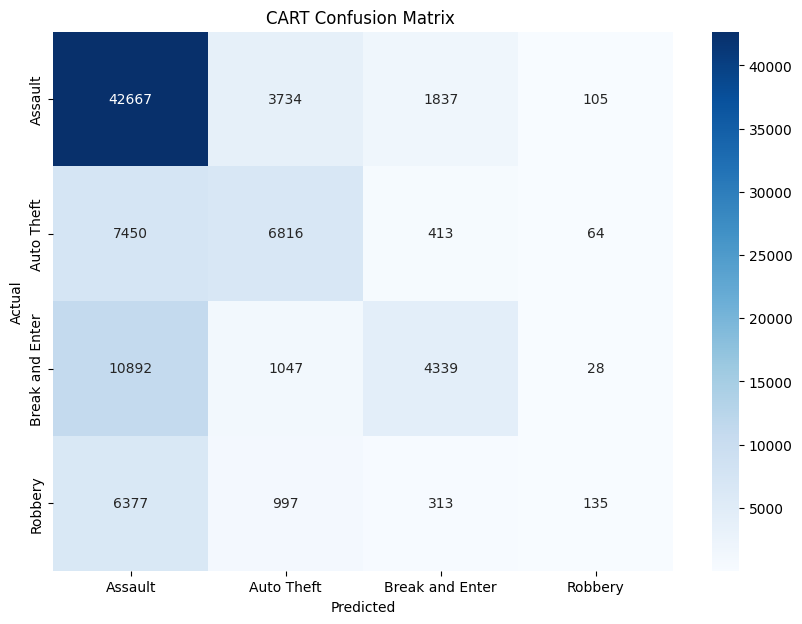

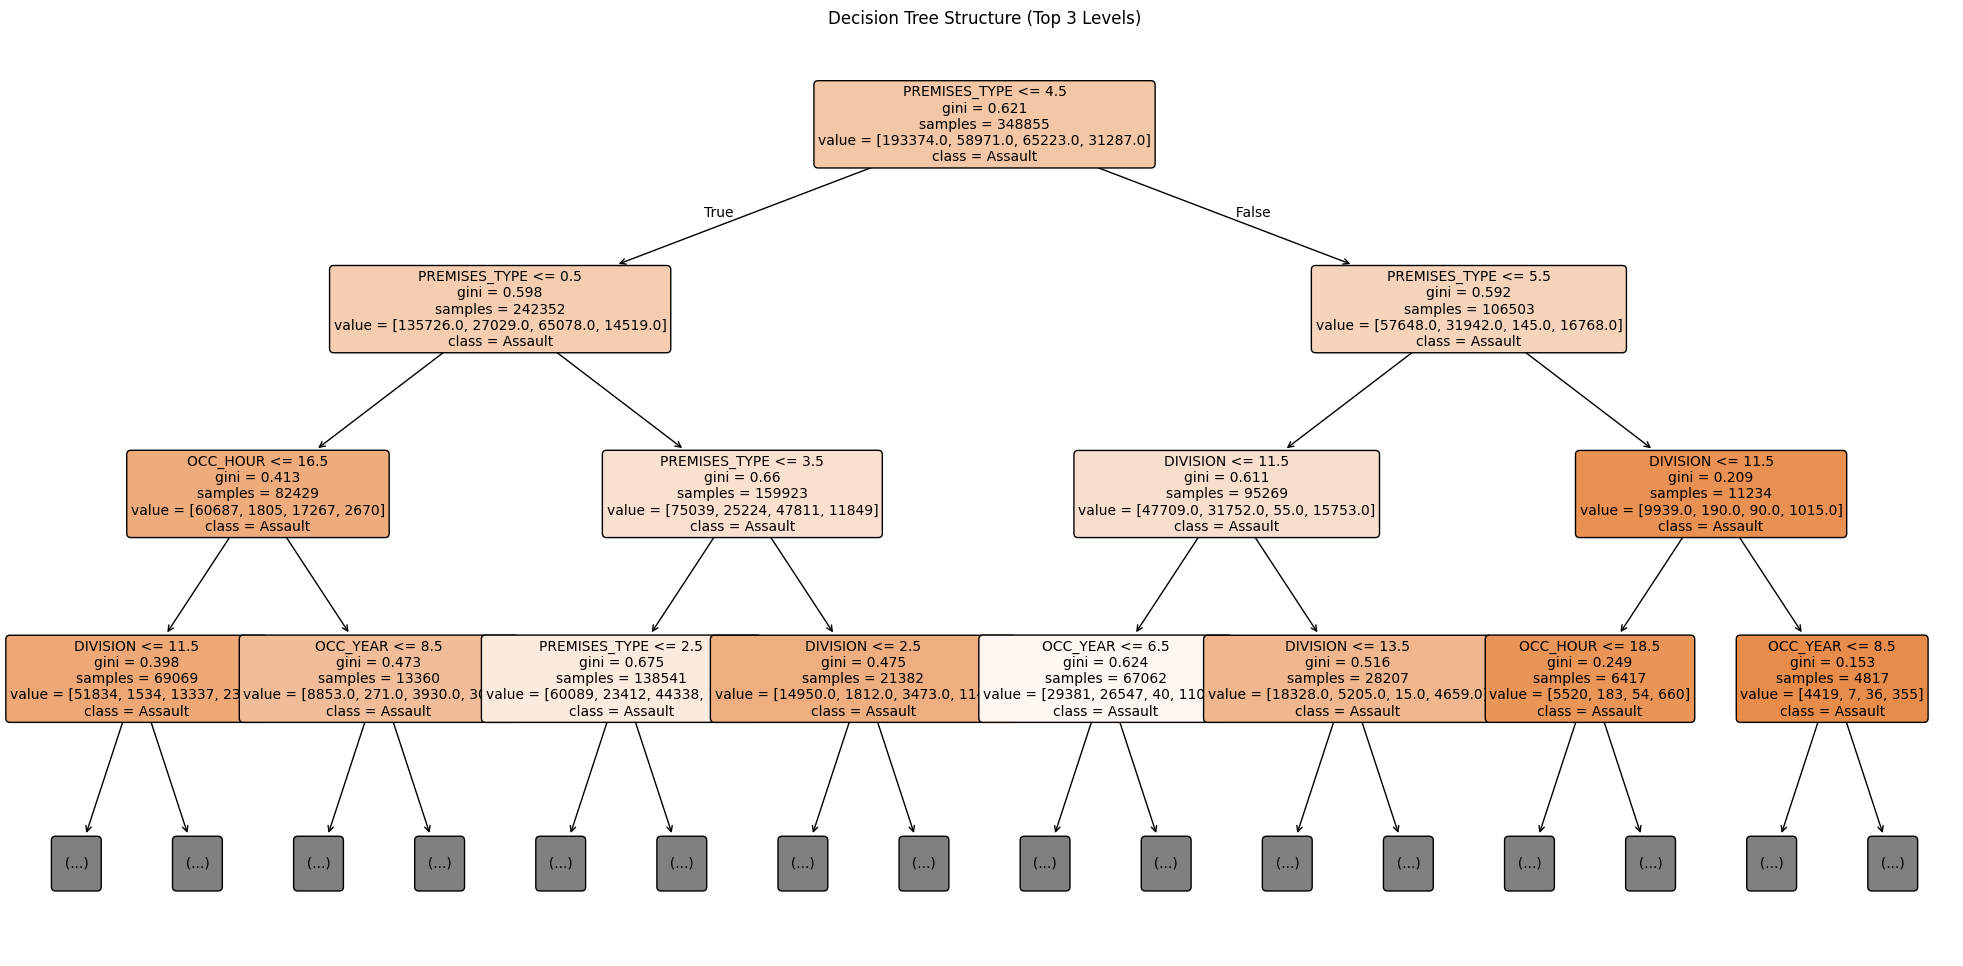

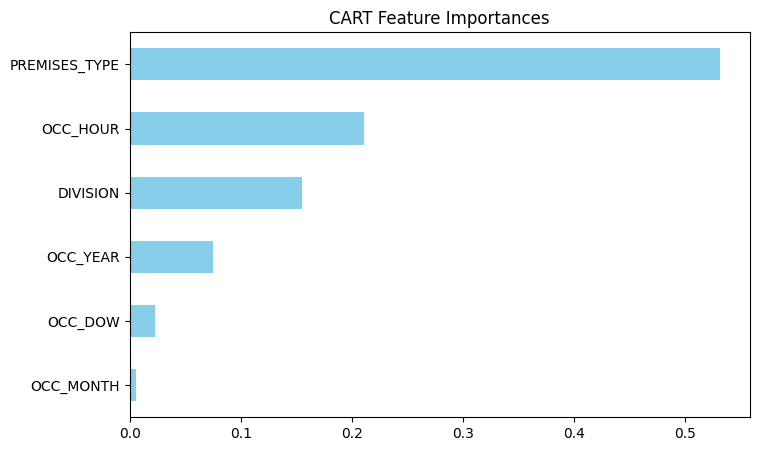

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# -----------------------------
# 0. Load Data Check
# -----------------------------
if 'df_crime' not in locals():
    print("⚠️ df_crime not found. Please load your dataset first.")
else:
    print("Initializing CART (Time + Premises + Division) .")

    # -------------------------------
    # 1. Features and target
    # -------------------------------
    features = ['OCC_YEAR', 'OCC_MONTH', 'OCC_DOW', 'OCC_HOUR', 'PREMISES_TYPE', 'DIVISION']
    target = 'MCI_CATEGORY'

    # Ensure columns exist
    missing_cols = [c for c in features + [target] if c not in df_crime.columns]
    if missing_cols:
        print(f"Error: The following columns are missing: {missing_cols}")
    else:
        # Drop rows with missing values
        df_cart = df_crime[features + [target]].dropna().copy()


        df_cart = df_cart[df_cart[target] != 'Theft Over']

        # =====================================

        # -------------------------------
        # 2. Encode categorical features
        # -------------------------------
        encoder = LabelEncoder()
        for col in features:
            df_cart[col] = encoder.fit_transform(df_cart[col].astype(str))

        # Encode target
        le_target = LabelEncoder()
        df_cart[target] = le_target.fit_transform(df_cart[target])

        # -------------------------------
        # 3. Train-test split 80:20
        # -------------------------------
        # Separate features and target variable
        X = df_cart[features]
        y = df_cart[target]

        print(f"Training on {len(X)} records...")

        # Split the dataset into 80% training and 20% testing
        # Stratify ensures the class distribution remains the same in both sets
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # -------------------------------
        # 4. CART Decision Tree
        # -------------------------------
        # Initialize a Decision Tree classifier using Gini impurity
        # max_depth limits the depth of the tree to prevent overfitting
        # min_samples_leaf ensures each leaf has at least 50 samples
        # random_state ensures reproducibility
        cart_model = DecisionTreeClassifier(
            criterion='gini',
            max_depth=10,            # Kept at 10 for detail
            min_samples_leaf=50,
            random_state=42
        )
        # Train the decision tree on the training data
        cart_model.fit(X_train, y_train)

        # -------------------------------
        # 5. Predictions and Evaluation
        # -------------------------------
        y_pred = cart_model.predict(X_test)

        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("F1-Score (macro):", f1_score(y_test, y_pred, average='macro'))
        print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))

        # -------------------------------
        # 6. Visualizations
        # -------------------------------

        # A. Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10,7))
        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_
        )
        plt.title("CART Confusion Matrix ")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

        # B. Plot top levels of the tree
        plt.figure(figsize=(25, 12))
        plot_tree(
            cart_model,
            feature_names=features,
            class_names=le_target.classes_,
            filled=True,
            rounded=True,
            fontsize=10,
            max_depth=3
        )
        plt.title(f"Decision Tree Structure (Top 3 Levels)")
        plt.show()

        # C. Feature importance
        importances = pd.Series(cart_model.feature_importances_, index=features).sort_values(ascending=True)
        plt.figure(figsize=(8,5))
        importances.plot(kind='barh', color='skyblue')
        plt.title("CART Feature Importances")
        plt.show()

Initializing CART (Time + Premises + Division) - EXCLUDING THEFT OVER...
Original shape: (451875, 7)
(436069, 7)

STARTING 5-FOLD CROSS-VALIDATION
Fold 1: Accuracy=0.6175
Fold 2: Accuracy=0.6173
Fold 3: Accuracy=0.6160
Fold 4: Accuracy=0.6179
Fold 5: Accuracy=0.6196
----------------------------------------
Average Accuracy:  0.6177
Average Precision: 0.5967
Average Recall:    0.6177
Average F1-Score:  0.5673

Training Final Model for Visualization (80/20 Split)...
Final Test Accuracy: 0.6186736074483454

Classification Report:
                  precision    recall  f1-score   support

        Assault       0.63      0.88      0.74     48343
     Auto Theft       0.54      0.46      0.50     14743
Break and Enter       0.63      0.27      0.37     16306
        Robbery       0.41      0.02      0.03      7822

       accuracy                           0.62     87214
      macro avg       0.55      0.41      0.41     87214
   weighted avg       0.60      0.62      0.57     87214



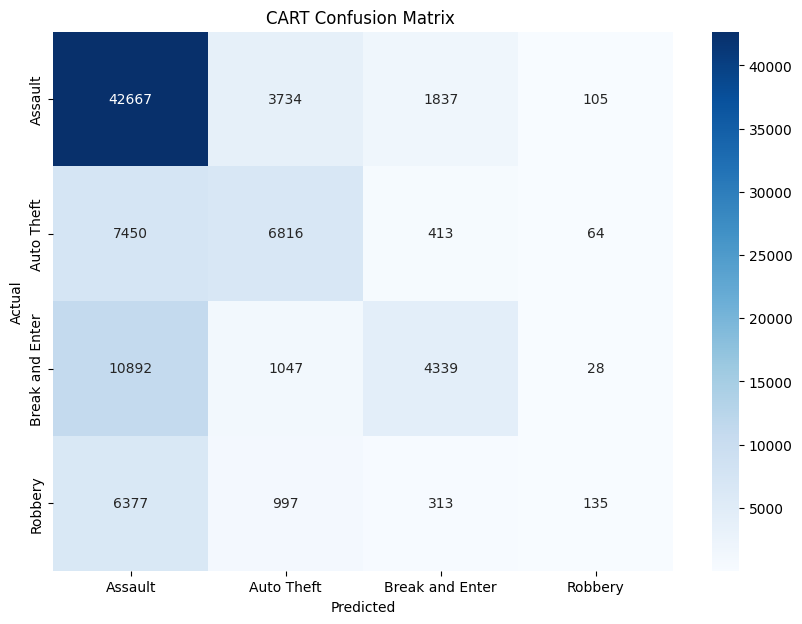

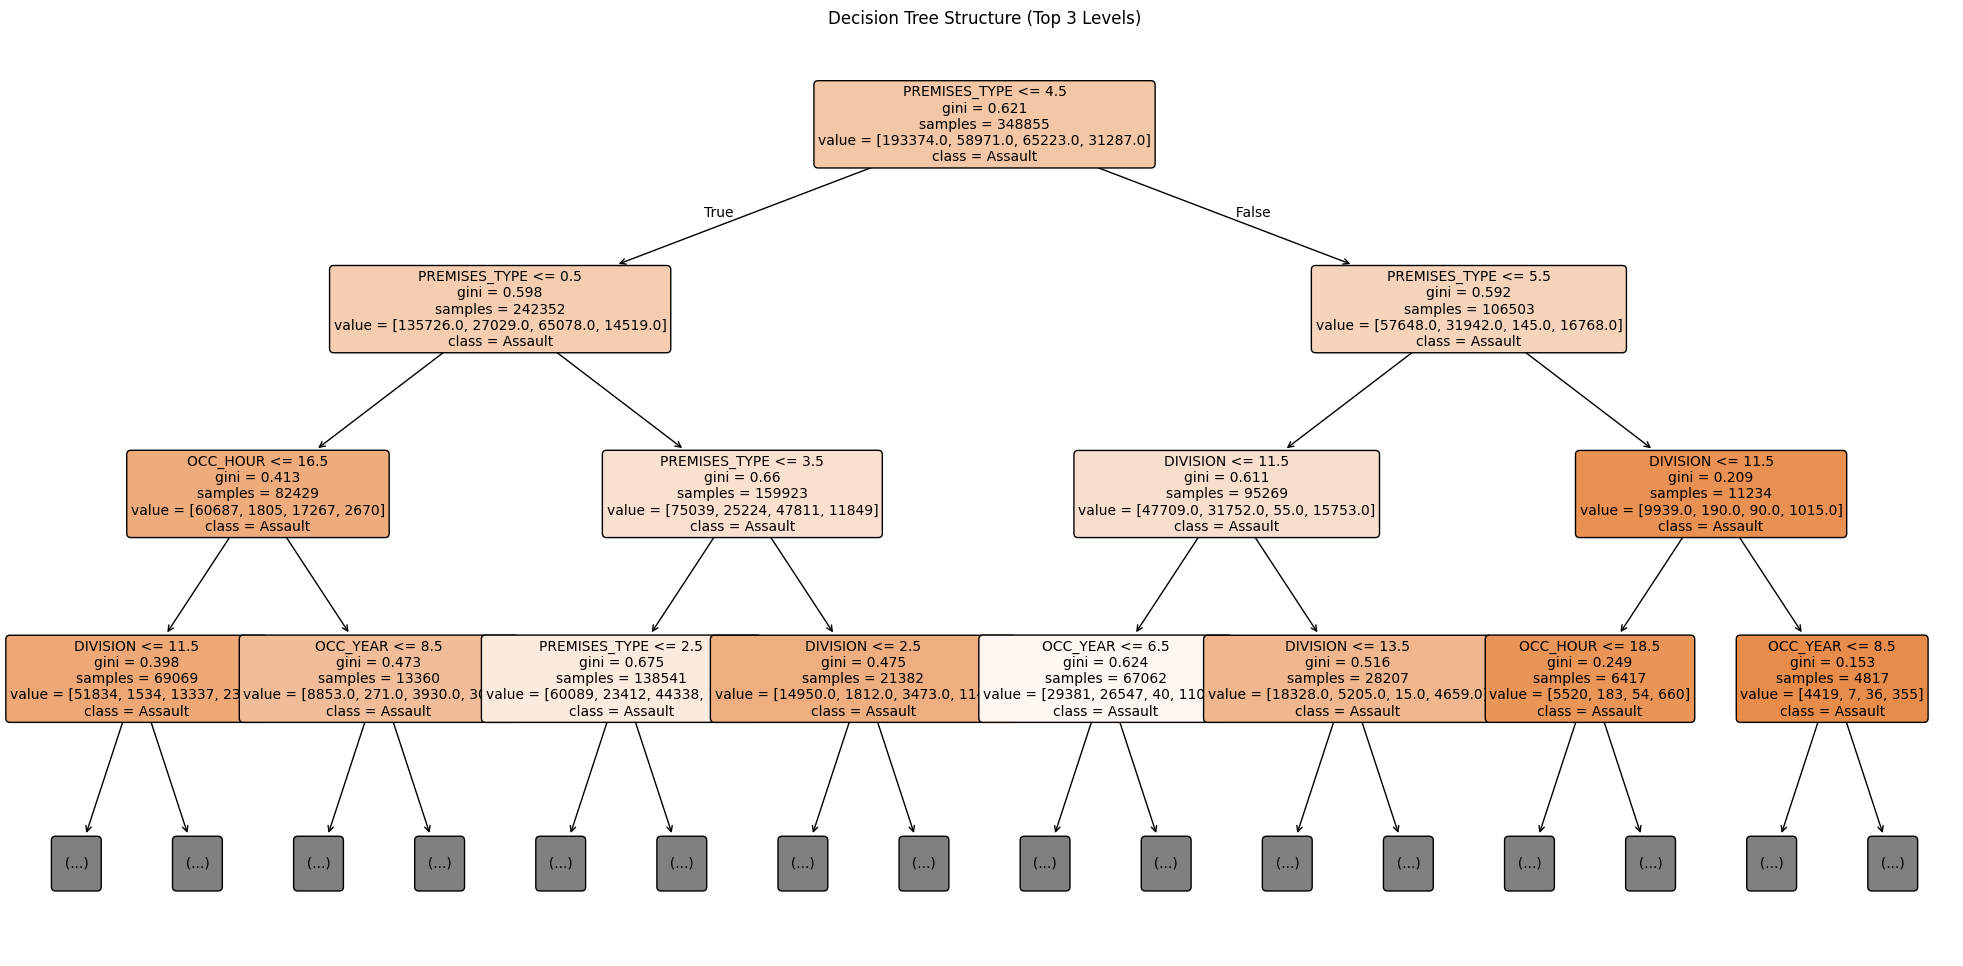

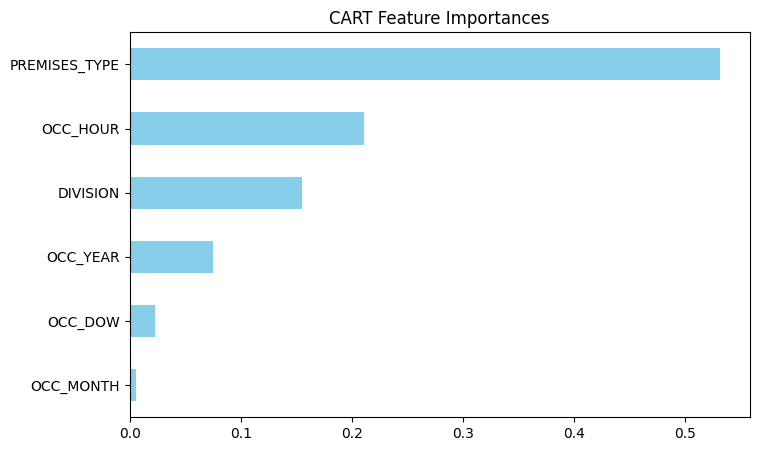

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# -----------------------------
# 0. Load Data Check
# -----------------------------
if 'df_crime' not in locals():
    print("⚠️ df_crime not found. Please load your dataset first.")
else:
    print("Initializing CART (Time + Premises + Division) - EXCLUDING THEFT OVER...")

    # -------------------------------
    # 1. Features and target
    # -------------------------------
    features = ['OCC_YEAR', 'OCC_MONTH', 'OCC_DOW', 'OCC_HOUR', 'PREMISES_TYPE', 'DIVISION']
    target = 'MCI_CATEGORY'

    # Ensure columns exist
    missing_cols = [c for c in features + [target] if c not in df_crime.columns]
    if missing_cols:
        print(f"Error: The following columns are missing: {missing_cols}")
    else:
        # Drop rows with missing values
        df_cart = df_crime[features + [target]].dropna().copy()

        # === FILTERING STEP ===
        print(f"Original shape: {df_cart.shape}")
        df_cart = df_cart[df_cart[target] != 'Theft Over']
        print(f"{df_cart.shape}")
        # ======================

        # -------------------------------
        # 2. Encode categorical features
        # -------------------------------
        encoder = LabelEncoder()
        for col in features:
            df_cart[col] = encoder.fit_transform(df_cart[col].astype(str))

        # Encode target (Now only 4 classes!)
        le_target = LabelEncoder()
        df_cart[target] = le_target.fit_transform(df_cart[target])

        # Prepare X and y
        X = df_cart[features]
        y = df_cart[target]

        # ========================================================
        # PART A: K-FOLD CROSS-VALIDATION (The Stability Check)
        # ========================================================
        print("\n" + "="*40)
        print("STARTING 5-FOLD CROSS-VALIDATION")
        print("="*40)

        k = 5
        skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

        # Initialize metrics lists
        acc_scores = []
        prec_scores = []
        rec_scores = []
        f1_scores = []

        # The Model Configuration
        cv_model = DecisionTreeClassifier(
            criterion='gini',
            max_depth=10,
            min_samples_leaf=50,
            random_state=42
        )

        for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
            X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
            y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

            cv_model.fit(X_train_fold, y_train_fold)
            y_pred_fold = cv_model.predict(X_val_fold)

            # Calculate metrics
            acc_scores.append(accuracy_score(y_val_fold, y_pred_fold))
            prec_scores.append(precision_score(y_val_fold, y_pred_fold, average='weighted', zero_division=0))
            rec_scores.append(recall_score(y_val_fold, y_pred_fold, average='weighted', zero_division=0))
            f1_scores.append(f1_score(y_val_fold, y_pred_fold, average='weighted', zero_division=0))

            print(f"Fold {fold}: Accuracy={acc_scores[-1]:.4f}")

        print("-" * 40)
        print(f"Average Accuracy:  {np.mean(acc_scores):.4f}")
        print(f"Average Precision: {np.mean(prec_scores):.4f}")
        print(f"Average Recall:    {np.mean(rec_scores):.4f}")
        print(f"Average F1-Score:  {np.mean(f1_scores):.4f}")
        print("="*40 + "\n")

        # ========================================================
        # PART B: FINAL MODEL & VISUALIZATION (80/20 Split)
        # ========================================================
        print("Training Final Model for Visualization (80/20 Split)...")

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        cart_model = DecisionTreeClassifier(
            criterion='gini',
            max_depth=10,
            min_samples_leaf=50,
            random_state=42
        )
        cart_model.fit(X_train, y_train)

        # Predictions
        y_pred = cart_model.predict(X_test)

        print("Final Test Accuracy:", accuracy_score(y_test, y_pred))
        print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))

        # -------------------------------
        # Visualizations
        # -------------------------------

        # A. Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10,7))
        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_
        )
        plt.title("CART Confusion Matrix ")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

        # B. Plot top levels of the tree
        plt.figure(figsize=(25, 12))
        plot_tree(
            cart_model,
            feature_names=features,
            class_names=le_target.classes_,
            filled=True,
            rounded=True,
            fontsize=10,
            max_depth=3
        )
        plt.title(f"Decision Tree Structure (Top 3 Levels)")
        plt.show()

        # C. Feature importance
        importances = pd.Series(cart_model.feature_importances_, index=features).sort_values(ascending=True)
        plt.figure(figsize=(8,5))
        importances.plot(kind='barh', color='skyblue')
        plt.title("CART Feature Importances")
        plt.show()